# Car Insurance Data Analytics and Claim amount prediction

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
#loading in the data set

df = pd.read_csv('data/Car_Insurance_Claim.csv')

# *Exploratory Data Analysis*

In [320]:
### Feature Dictionary

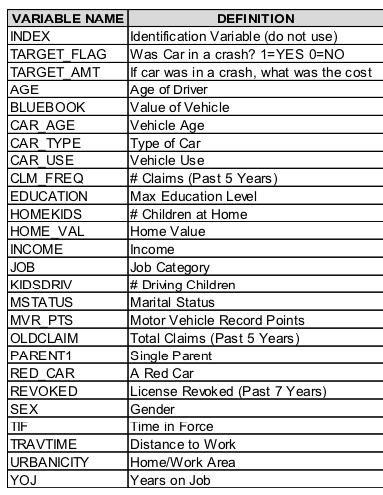

In [321]:
df.head()

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ   INCOME PARENT1  \
0   63581743         0  16MAR39  60.0         0  11.0  $67,349      No   
1  132761049         0  21JAN56  43.0         0  11.0  $91,449      No   
2  921317019         0  18NOV51  48.0         0  11.0  $52,881      No   
3  727598473         0  05MAR64  35.0         1  10.0  $16,039      No   
4  450221861         0  05JUN48  51.0         0  14.0      NaN      No   

   HOME_VAL MSTATUS  ... CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED MVR_PTS  \
0        $0    z_No  ...  Minivan     yes   $4,461         2      No       3   
1  $257,252    z_No  ...  Minivan     yes       $0         0      No       0   
2        $0    z_No  ...      Van     yes       $0         0      No       2   
3  $124,191     Yes  ...    z_SUV      no  $38,690         2      No       3   
4  $306,251     Yes  ...  Minivan     yes       $0         0      No       0   

   CLM_AMT CAR_AGE CLAIM_FLAG           URBANICITY  
0       $0    18.0          0  Highly Urban/ Urban  
1       $0     1.0          0  Highly Urban/ Urban  
2       $0    10.0          0  Highly Urban/ Urban  
3       $0    10.0          0  Highly Urban/ Urban  
4       $0     6.0          0  Highly Urban/ Urban  

[5 rows x 27 columns]

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [323]:
df.describe()

ID      KIDSDRIV           AGE      HOMEKIDS          YOJ  \
count  1.030200e+04  10302.000000  10295.000000  10302.000000  9754.000000   
mean   4.956631e+08      0.169288     44.837397      0.720443    10.474062   
std    2.864675e+08      0.506512      8.606445      1.116323     4.108943   
min    6.317500e+04      0.000000     16.000000      0.000000     0.000000   
25%    2.442869e+08      0.000000     39.000000      0.000000     9.000000   
50%    4.970043e+08      0.000000     45.000000      0.000000    11.000000   
75%    7.394551e+08      0.000000     51.000000      1.000000    13.000000   
max    9.999264e+08      4.000000     81.000000      5.000000    23.000000   

           TRAVTIME           TIF      CLM_FREQ       MVR_PTS      CAR_AGE  \
count  10302.000000  10302.000000  10302.000000  10302.000000  9663.000000   
mean      33.416424      5.329159      0.800718      1.710153     8.298148   
std       15.869687      4.110795      1.154079      2.159015     5.714450   
min        5.000000      1.000000      0.000000      0.000000    -3.000000   
25%       22.000000      1.000000      0.000000      0.000000     1.000000   
50%       33.000000      4.000000      0.000000      1.000000     8.000000   
75%       44.000000      7.000000      2.000000      3.000000    12.000000   
max      142.000000     25.000000      5.000000     13.000000    28.000000   

         CLAIM_FLAG  
count  10302.000000  
mean       0.266550  
std        0.442177  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [324]:
### Examining the label Feature

In [325]:
df['CLAIM_FLAG'].unique()

array([0, 1], dtype=int64)

In [15]:
df['CLAIM_FLAG'].value_counts()

CLAIM_FLAG
0    7556
1    2746
Name: count, dtype: int64

In [326]:
((df['CLAIM_FLAG'].value_counts()/df['CLAIM_FLAG'].count())*100).round()

CLAIM_FLAG
0    73.0
1    27.0
Name: count, dtype: float64

<BarContainer object of 2 artists>

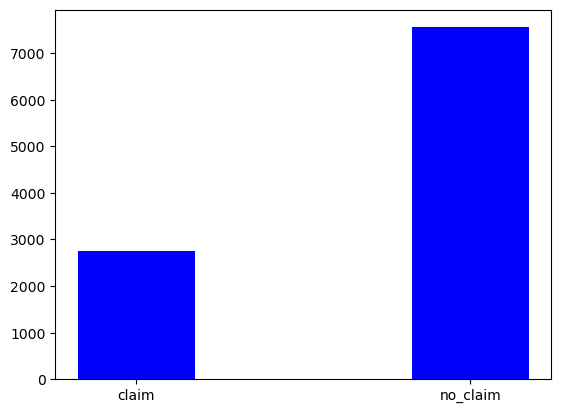

In [327]:
no_claims_count = (df.CLAIM_FLAG == 0).sum()
no_claims_count

claims_count = (df.CLAIM_FLAG == 1).sum()
claims_count, no_claims_count

x =['claim', 'no_claim']

plt.bar(x,[claims_count, no_claims_count], width=0.35, color='blue')


## There seems to be a slight data imbalance
This may cause issues down the road during model training
Measures that we can use to handle this
* Gnerate synthetic samples (SMOTE)
* Under sampling the majority class (not advised)
* Over sampling the minority class
* A mix of both under sampling and over sampling

## **Feature exploration

### Missing values check

In [328]:
df.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [13]:
missing_values = df.isnull()

# Step 3: Find the row and column where the missing values exist
missing_value_locs = df[df.isnull().any(axis=1)]

# Step 4: Display the missing values with claim information
# Assuming the 'Claim' column contains claim IDs
missing_value_locs



ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
4      450221861         0  05JUN48  51.0         0  14.0       NaN      No   
5      743146596         0  17MAY49  50.0         0   NaN  $114,986      No   
7      792300541         0  28FEB45  54.0         0   NaN   $18,755      No   
10     892208080         1  14DEC61  37.0         2   NaN  $107,961      No   
16     665591504         0  19JUL46  53.0         0  11.0  $130,795      No   
...          ...       ...      ...   ...       ...   ...       ...     ...   
10268  137193833         0  04JUL67  32.0         2  14.0       NaN      No   
10271   63104807         0  03JAN52  47.0         0  15.0   $31,045      No   
10274  630264509         0  15SEP43  56.0         0  11.0   $12,917      No   
10293  814422920         0  17AUG48  51.0         0  10.0  $128,523      No   
10298   61970712         0  17JUN53  46.0         0   9.0  $107,204      No   

       HOME_VAL MSTATUS  ...     CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
4      $306,251     Yes  ...      Minivan     yes       $0         0      No   
5      $243,925     Yes  ...        z_SUV      no  $19,217         2     Yes   
7           NaN     Yes  ...        z_SUV      no       $0         0      No   
10     $333,680     Yes  ...          Van     yes   $2,374         1     Yes   
16           $0    z_No  ...  Panel Truck     yes       $0         0      No   
...         ...     ...  ...          ...     ...      ...       ...     ...   
10268  $219,966     Yes  ...          Van      no       $0         0      No   
10271  $138,614     Yes  ...        z_SUV      no  $44,376         1     Yes   
10274       NaN    z_No  ...        z_SUV      no       $0         0      No   
10293        $0    z_No  ...  Panel Truck      no   $3,995         3      No   
10298  $332,591     Yes  ...  Panel Truck      no       $0         0      No   

      MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG             URBANICITY  
4           0       $0     6.0          0    Highly Urban/ Urban  
5           3       $0    17.0          0    Highly Urban/ Urban  
7           0       $0     1.0          0    Highly Urban/ Urban  
10         10   $4,021     7.0          1    Highly Urban/ Urban  
16          3   $1,267    10.0          1    Highly Urban/ Urban  
...       ...      ...     ...        ...                    ...  
10268       1       $0     9.0          0  z_Highly Rural/ Rural  
10271       0       $0     NaN          0    Highly Urban/ Urban  
10274       0       $0    12.0          0    Highly Urban/ Urban  
10293       1   $3,288    15.0          1    Highly Urban/ Urban  
10298       0       $0     1.0          0    Highly Urban/ Urban  

[2645 rows x 27 columns]

### Heatmap of missing values

<Axes: >

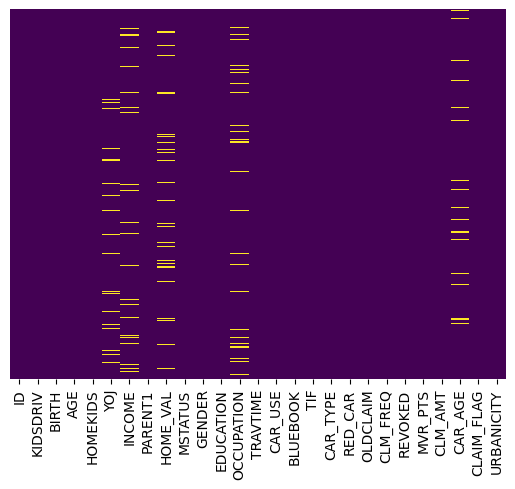

In [330]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,  cmap='viridis' )

## Distribution of data in categorical features

### Gender

In [331]:
df['GENDER'].unique()

array(['M', 'z_F'], dtype=object)

In [332]:
Gender_Types = df.GENDER.value_counts().index

Gender_Counts = df.GENDER.value_counts().values

Gender_Types, Gender_Counts

(Index(['z_F', 'M'], dtype='object', name='GENDER'),
 array([5545, 4757], dtype=int64))

([<matplotlib.patches.Wedge at 0x26d4c2f8620>,
 [Text(-0.13184754692436554, 1.0920696975788804, 'z_F'),
  Text(0.1318476491713088, -1.0920696852344174, 'M')],
 [Text(-0.07191684377692664, 0.595674380497571, '53.82%'),
  Text(0.0719168995479866, -0.5956743737642276, '46.18%')])

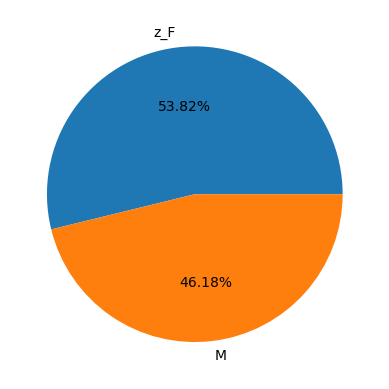

In [333]:
plt.pie(Gender_Counts, labels=Gender_Types, autopct='%1.2f%%' )

### MSTATUS (Marital_Status)

In [334]:
df['MSTATUS'].unique()

array(['z_No', 'Yes'], dtype=object)

In [335]:
Mstatus_types = df.MSTATUS.value_counts().index

Mstatus_val = df.MSTATUS.value_counts().values

Mstatus_types,Mstatus_val

(Index(['Yes', 'z_No'], dtype='object', name='MSTATUS'),
 array([6188, 4114], dtype=int64))

([<matplotlib.patches.Wedge at 0x26d4c3a9ee0>,
 [Text(-0.3420874091214939, 1.04545502271525, 'Yes'),
  Text(0.3420875070040555, -1.0454549906867108, 'z_No')])

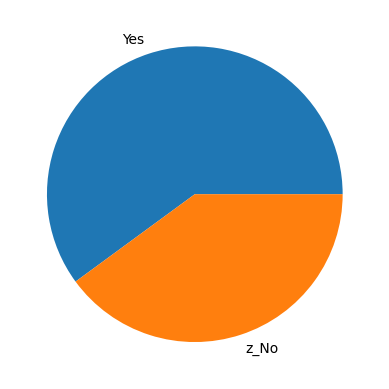

In [336]:
plt.pie(Mstatus_val, labels= Mstatus_types)

### PARENT1 ( Is the person a single parent? )

In [337]:
df['PARENT1'].unique()

array(['No', 'Yes'], dtype=object)

In [338]:
parent_Types = df.PARENT1.value_counts().index

parent_Counts = df.PARENT1.value_counts().values

parent_Types, parent_Counts

(Index(['No', 'Yes'], dtype='object', name='PARENT1'),
 array([8959, 1343], dtype=int64))

([<matplotlib.patches.Wedge at 0x26d4c3a33e0>,
 [Text(-1.0090311696810421, 0.438013810983293, 'No'),
  Text(1.0090311491761348, -0.4380138582194507, 'Yes')])

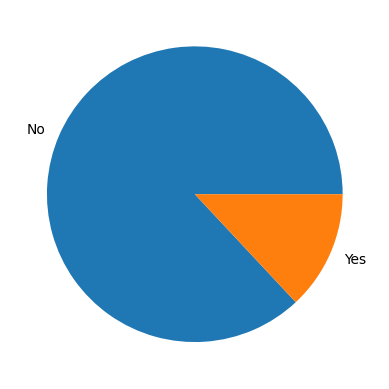

In [339]:
plt.pie(parent_Counts, labels= parent_Types)

### URBANICITY ( Home/ Work area)

In [340]:
df['URBANICITY'].unique()

array(['Highly Urban/ Urban', 'z_Highly Rural/ Rural'], dtype=object)

In [341]:
wArea_index = df.URBANICITY.value_counts().index

wArea_val = df.URBANICITY.value_counts().values

wArea_index, wArea_val

(Index(['Highly Urban/ Urban', 'z_Highly Rural/ Rural'], dtype='object', name='URBANICITY'),
 array([8230, 2072], dtype=int64))

([<matplotlib.patches.Wedge at 0x26d4b4697f0>,
 [Text(-0.8876259963624045, 0.6497076962616721, 'Highly Urban/ Urban'),
  Text(0.8876260267774156, -0.6497076547088997, 'z_Highly Rural/ Rural')])

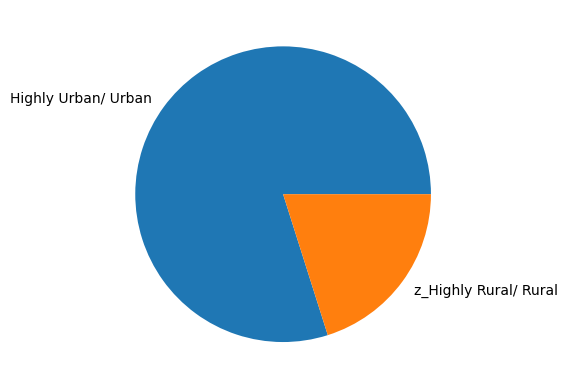

In [342]:
plt.pie(wArea_val, labels = wArea_index)

### EDUCATION (Education level)

In [343]:
df['EDUCATION'].unique()

array(['PhD', 'z_High School', 'Bachelors', '<High School', 'Masters'],
      dtype=object)

In [344]:
edLevel_index = df.EDUCATION.value_counts().index

edLevel_val = df.EDUCATION.value_counts().values

edLevel_index, edLevel_val

(Index(['z_High School', 'Bachelors', 'Masters', '<High School', 'PhD'], dtype='object', name='EDUCATION'),
 array([2952, 2823, 2078, 1515,  934], dtype=int64))

([<matplotlib.patches.Wedge at 0x26d4c341910>,
 [Text(0.6835885197819177, 0.8618043488068314, 'z_High School'),
  Text(-0.9755440196920153, 0.5082458712504657, 'Bachelors'),
  Text(-0.5810705599147047, -0.9340005376874319, 'Masters'),
  Text(0.564748497385663, -0.9439592865694135, '<High School'),
  Text(1.0556824959367865, -0.3090865053228249, 'PhD')])

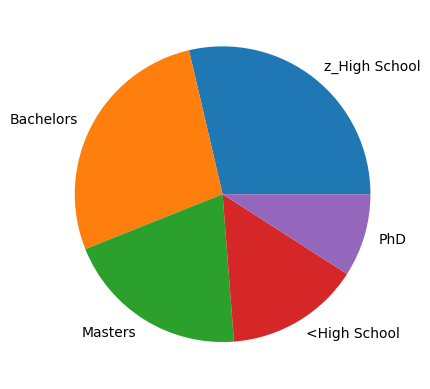

In [345]:
plt.pie(edLevel_val, labels = edLevel_index)

### OCCUPATION 
 ***nan values will be ignored in the pie chart***
 
 `.value_counts` ignores NA values by default

In [346]:
df['OCCUPATION'].unique()

array(['Professional', 'z_Blue Collar', 'Manager', 'Clerical', 'Doctor',
       'Lawyer', nan, 'Home Maker', 'Student'], dtype=object)

In [347]:
occ_index = df.OCCUPATION.value_counts().index

occ_val = df.OCCUPATION.value_counts().values

occ_index, occ_val

(Index(['z_Blue Collar', 'Clerical', 'Professional', 'Manager', 'Lawyer',
        'Student', 'Home Maker', 'Doctor'],
       dtype='object', name='OCCUPATION'),
 array([2288, 1590, 1408, 1257, 1031,  899,  843,  321], dtype=int64))

([<matplotlib.patches.Wedge at 0x26d4b47d7c0>,
 [Text(0.8079464320584789, 0.746473417426216, 'z_Blue Collar'),
  Text(-0.46781200475538204, 0.9955661345218361, 'Clerical'),
  Text(-1.0869490935191102, 0.16894279534204779, 'Professional'),
  Text(-0.8309081486821794, -0.7208270586302608, 'Manager'),
  Text(-0.1211373056973322, -1.0933095413323672, 'Lawyer'),
  Text(0.5454389157223369, -0.9552467687543578, 'Student'),
  Text(0.9736038941204318, -0.5119525928770468, 'Home Maker'),
  Text(1.0939828144935797, -0.11489822275695281, 'Doctor')])

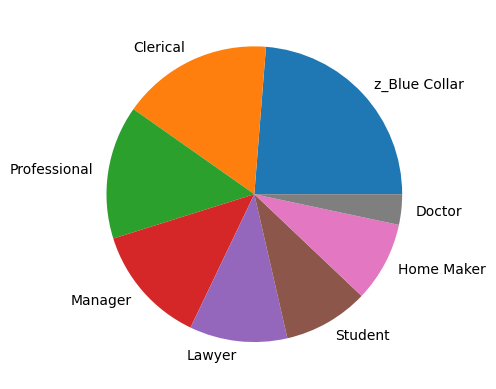

In [348]:
plt.pie(occ_val, labels = occ_index)

### CAR_TYPE

In [349]:
df['CAR_TYPE'].unique()

array(['Minivan', 'Van', 'z_SUV', 'Sports Car', 'Panel Truck', 'Pickup'],
      dtype=object)

In [350]:
cType_index = df.CAR_TYPE.value_counts().index

cType_val = df.CAR_TYPE.value_counts().values

cType_index, cType_val

(Index(['z_SUV', 'Minivan', 'Pickup', 'Sports Car', 'Van', 'Panel Truck'], dtype='object', name='CAR_TYPE'),
 array([2883, 2694, 1772, 1179,  921,  853], dtype=int64))

([<matplotlib.patches.Wedge at 0x26d4b46cc50>,
 [Text(0.7015695075374995, 0.8472309166299296, 'z_SUV'),
  Text(-0.9309757196600739, 0.5859046077676876, 'Minivan'),
  Text(-0.7662288266844867, -0.7892359502441048, 'Pickup'),
  Text(0.14183259251414704, -1.0908178196659222, 'Sports Car'),
  Text(0.7655064732728256, -0.7899366046572351, 'Van'),
  Text(1.0629944208977895, -0.28291847083598765, 'Panel Truck')])

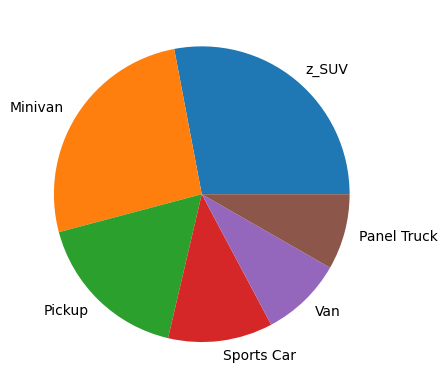

In [351]:
plt.pie(cType_val, labels = cType_index)

### CAR_USE (what is the primary use of the car)

In [352]:
df['CAR_USE'].unique()

array(['Private', 'Commercial'], dtype=object)

In [353]:
cUse_index = df.CAR_USE.value_counts().index

cUse_val = df.CAR_USE.value_counts().values

cUse_index, cUse_val

(Index(['Private', 'Commercial'], dtype='object', name='CAR_USE'),
 array([6513, 3789], dtype=int64))

([<matplotlib.patches.Wedge at 0x26d4c66be00>,
 [Text(-0.4438527509564001, 1.0064763958824052, 'Private'),
  Text(0.44385275095640014, -1.0064763958824052, 'Commercial')])

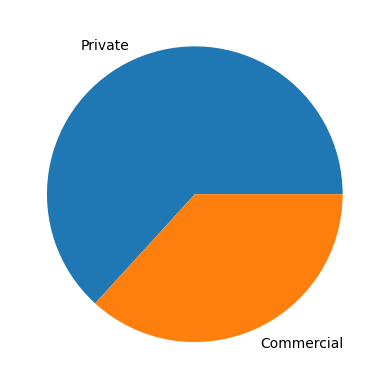

In [354]:
plt.pie(cUse_val, labels =cUse_index)

### RED_CAR (Is the car red?)
* Urban legends suggest red cars are involved in more car accidents

In [355]:
df['RED_CAR'].unique()

array(['yes', 'no'], dtype=object)

In [356]:
cRed_index = df.RED_CAR.value_counts().index

cRed_val = df.RED_CAR.value_counts().values

cRed_index, cRed_val

(Index(['no', 'yes'], dtype='object', name='RED_CAR'),
 array([7326, 2976], dtype=int64))

([<matplotlib.patches.Wedge at 0x26d4c5d1580>,
 [Text(-0.6772628912309699, 0.8667842731392094, 'no'),
  Text(0.6772628912309695, -0.8667842731392097, 'yes')])

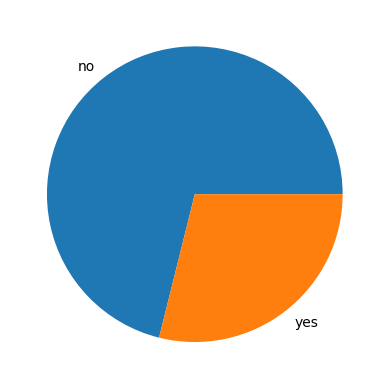

In [357]:
plt.pie(cRed_val, labels =cRed_index)

### REVOKED (Has the license been revoked in the past years?)

In [358]:
df['REVOKED'].unique()

array(['No', 'Yes'], dtype=object)

In [359]:
revoked_index = df.REVOKED.value_counts().index

revoked_val = df.REVOKED.value_counts().values

revoked_index, revoked_val

(Index(['No', 'Yes'], dtype='object', name='REVOKED'),
 array([9041, 1261], dtype=int64))

([<matplotlib.patches.Wedge at 0x26d4c61ef00>,
 [Text(-1.0196674760324742, 0.4126478381399371, 'No'),
  Text(1.0196674470563125, -0.4126479097410557, 'Yes')])

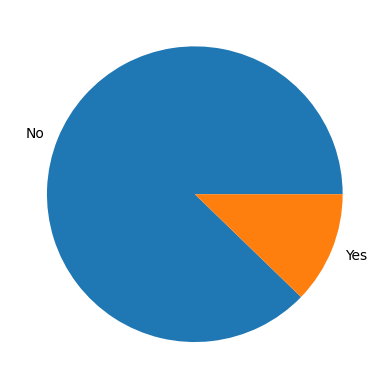

In [360]:
plt.pie(revoked_val, labels = revoked_index)

In [ ]:
discreteVariable = 

# Numerical Feature Analysis

### cleaning features with monetary symbology

In [361]:
for col in ['OLDCLAIM', 'CLM_AMT', 'HOME_VAL', 'INCOME', 'BLUEBOOK']:
 df[col] = df[col].replace('[$/,]', '', regex=True).astype('float')

## Correlation

In [362]:
# Select only columns with numeric data types (int and float)
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
df_corr = df_numeric.corr()

# Display the correlation matrix
df_corr


ID  KIDSDRIV       AGE  HOMEKIDS       YOJ    INCOME  \
ID          1.000000  0.003508 -0.010423  0.009144 -0.011068 -0.021582   
KIDSDRIV    0.003508  1.000000 -0.078427  0.463653  0.042971 -0.043217   
AGE        -0.010423 -0.078427  1.000000 -0.447787  0.140878  0.186202   
HOMEKIDS    0.009144  0.463653 -0.447787  1.000000  0.077707 -0.160230   
YOJ        -0.011068  0.042971  0.140878  0.077707  1.000000  0.293899   
INCOME     -0.021582 -0.043217  0.186202 -0.160230  0.293899  1.000000   
HOME_VAL   -0.014370 -0.015447  0.209600 -0.107483  0.272198  0.578943   
TRAVTIME   -0.002410  0.012207 -0.001569 -0.000722 -0.017152 -0.051853   
BLUEBOOK   -0.000213 -0.028508  0.166290 -0.108569  0.148086  0.429095   
TIF        -0.010196 -0.005830 -0.001890  0.007509  0.023921  0.002361   
OLDCLAIM    0.002615  0.023886 -0.033378  0.029756 -0.005077 -0.039347   
CLM_FREQ   -0.001436  0.038952 -0.037641  0.038661 -0.023535 -0.049220   
MVR_PTS     0.008391  0.048424 -0.075732  0.064294 -0.041593 -0.063495   
CLM_AMT    -0.012758  0.068283 -0.049034  0.068646 -0.026799 -0.057686   
CAR_AGE    -0.004771 -0.059629  0.178592 -0.159008  0.064685  0.417301   
CLAIM_FLAG -0.005938  0.108421 -0.106969  0.123049 -0.066265 -0.142587   

            HOME_VAL  TRAVTIME  BLUEBOOK       TIF  OLDCLAIM  CLM_FREQ  \
ID         -0.014370 -0.002410 -0.000213 -0.010196  0.002615 -0.001436   
KIDSDRIV   -0.015447  0.012207 -0.028508 -0.005830  0.023886  0.038952   
AGE         0.209600 -0.001569  0.166290 -0.001890 -0.033378 -0.037641   
HOMEKIDS   -0.107483 -0.000722 -0.108569  0.007509  0.029756  0.038661   
YOJ         0.272198 -0.017152  0.148086  0.023921 -0.005077 -0.023535   
INCOME      0.578943 -0.051853  0.429095  0.002361 -0.039347 -0.049220   
HOME_VAL    1.000000 -0.035139  0.261962  0.006768 -0.059803 -0.093854   
TRAVTIME   -0.035139  1.000000 -0.022536 -0.013327 -0.013806  0.008274   
BLUEBOOK    0.261962 -0.022536  1.000000  0.000705 -0.030725 -0.042130   
TIF         0.006768 -0.013327  0.000705  1.000000 -0.015520 -0.017378   
OLDCLAIM   -0.059803 -0.013806 -0.030725 -0.015520  1.000000  0.494468   
CLM_FREQ   -0.093854  0.008274 -0.042130 -0.017378  0.494468  1.000000   
MVR_PTS    -0.092460  0.009694 -0.044818 -0.031164  0.262031  0.401413   
CLM_AMT    -0.091987  0.031270 -0.002443 -0.046518  0.076535  0.122204   
CAR_AGE     0.223198 -0.033290  0.194366  0.007897 -0.019163 -0.018904   
CLAIM_FLAG -0.185390  0.053283 -0.103287 -0.081225  0.142918  0.222618   

             MVR_PTS   CLM_AMT   CAR_AGE  CLAIM_FLAG  
ID          0.008391 -0.012758 -0.004771   -0.005938  
KIDSDRIV    0.048424  0.068283 -0.059629    0.108421  
AGE        -0.075732 -0.049034  0.178592   -0.106969  
HOMEKIDS    0.064294  0.068646 -0.159008    0.123049  
YOJ        -0.041593 -0.026799  0.064685   -0.066265  
INCOME     -0.063495 -0.057686  0.417301   -0.142587  
HOME_VAL   -0.092460 -0.091987  0.223198   -0.185390  
TRAVTIME    0.009694  0.031270 -0.033290    0.053283  
BLUEBOOK   -0.044818 -0.002443  0.194366   -0.103287  
TIF        -0.031164 -0.046518  0.007897   -0.081225  
OLDCLAIM    0.262031  0.076535 -0.019163    0.142918  
CLM_FREQ    0.401413  0.122204 -0.018904    0.222618  
MVR_PTS     1.000000  0.133567 -0.033898    0.222485  
CLM_AMT     0.133567  1.000000 -0.066060    0.530558  
CAR_AGE    -0.033898 -0.066060  1.000000   -0.109818  
CLAIM_FLAG  0.222485  0.530558 -0.109818    1.000000

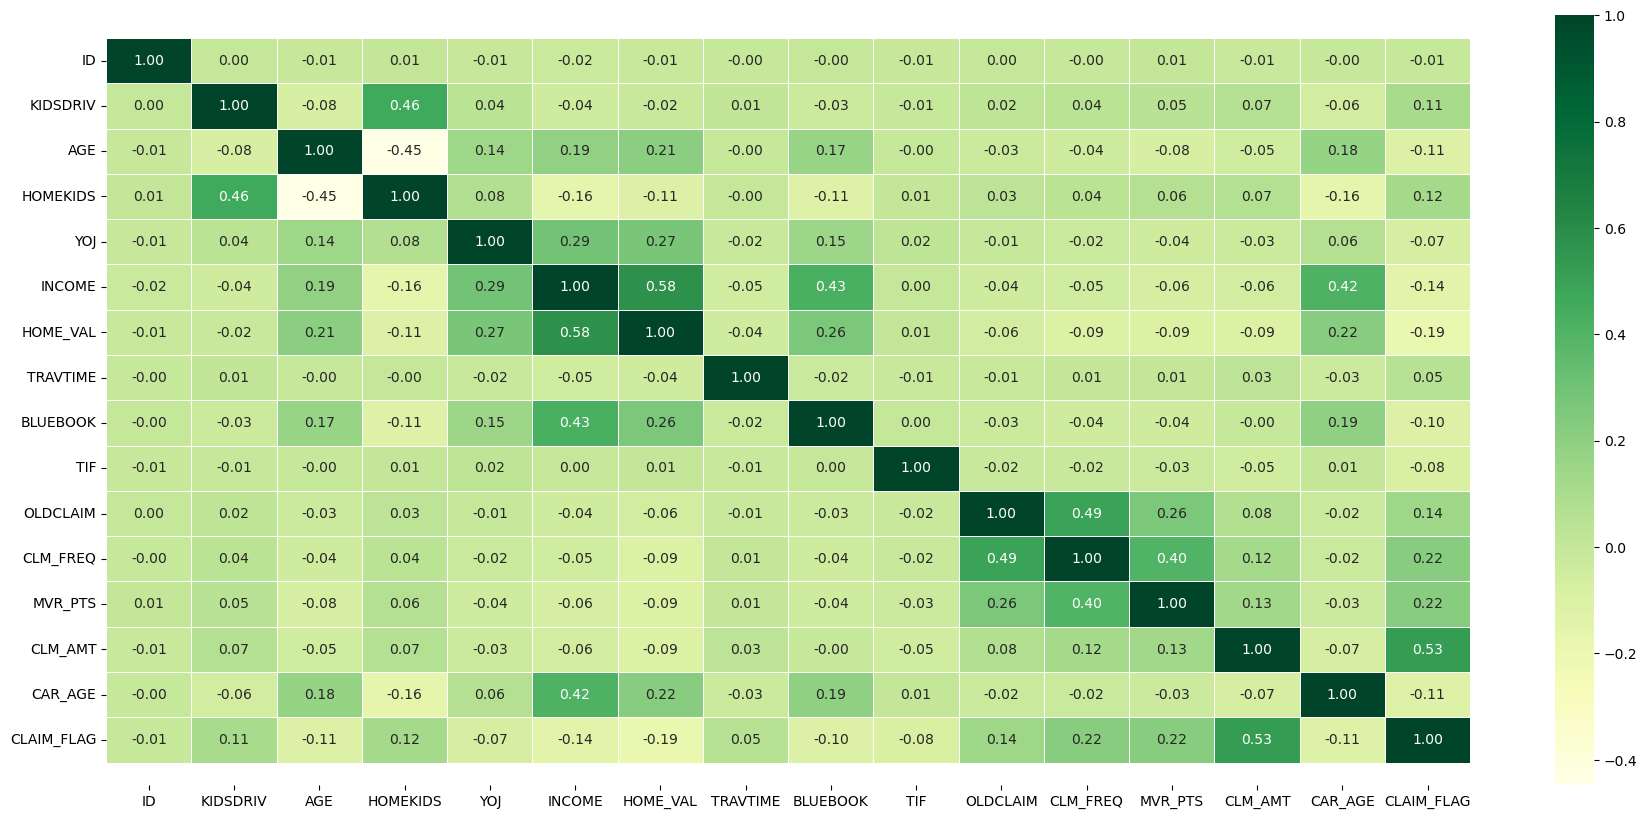

In [363]:
corr_matrix = df_corr
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [364]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation of each numeric column with CLAIM_FLAG
correlations = df_numeric.corrwith(df['CLAIM_FLAG'])

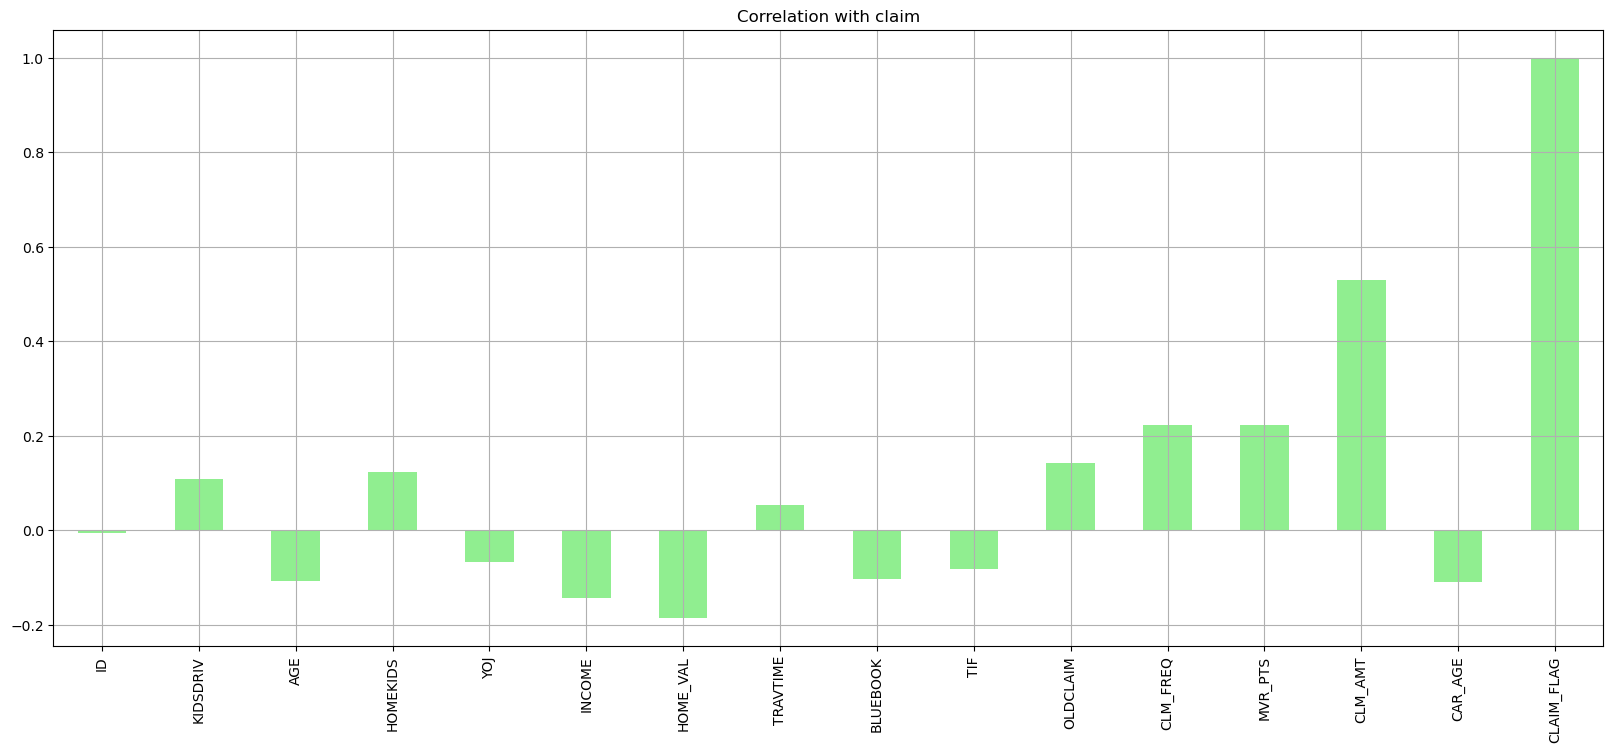

In [365]:
correlations.plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with claim", color="lightgreen");

### Tracking Categorical features against CLAIM_FLAG

In [366]:
discrete=['PARENT1','MSTATUS','RED_CAR','REVOKED','CAR_USE', 'URBANICITY', ']
Target = ['CLAIM_FLAG']

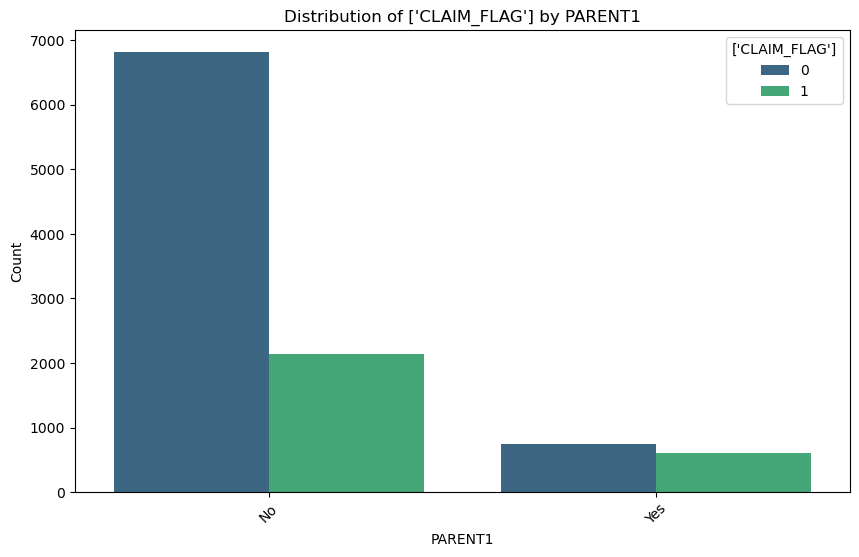

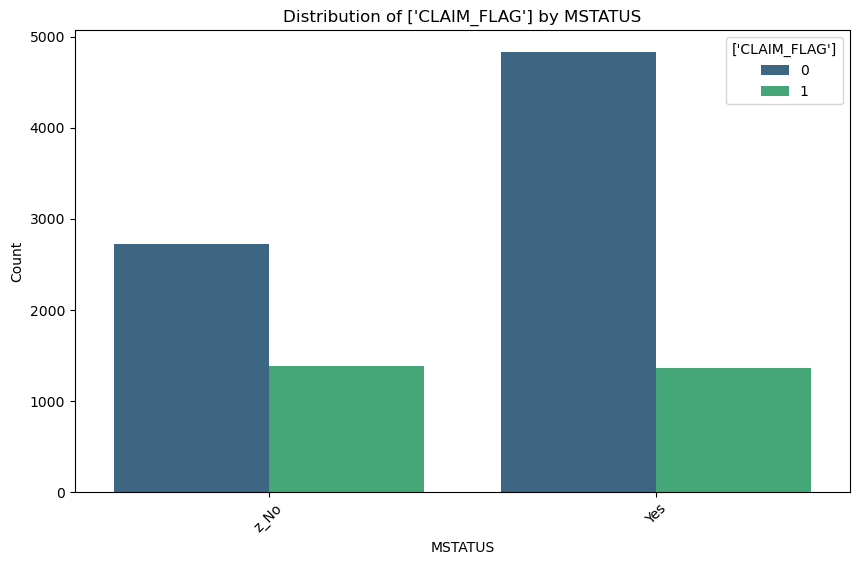

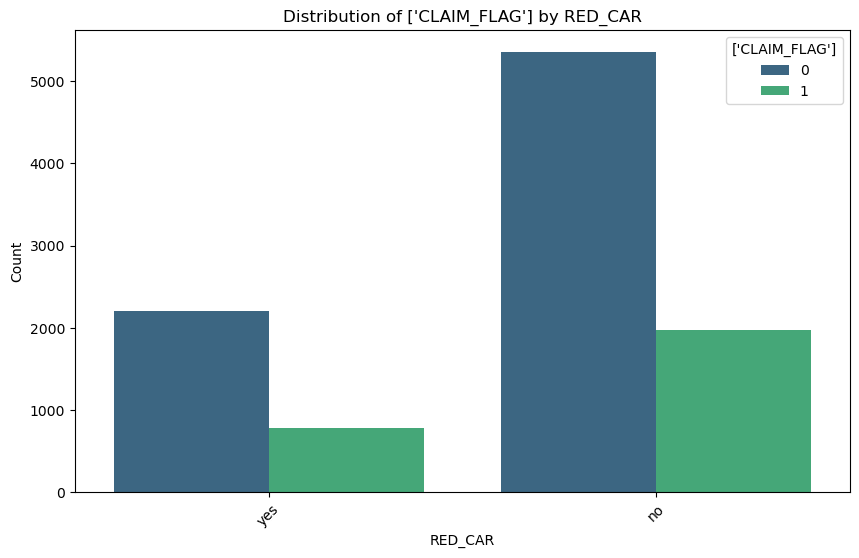

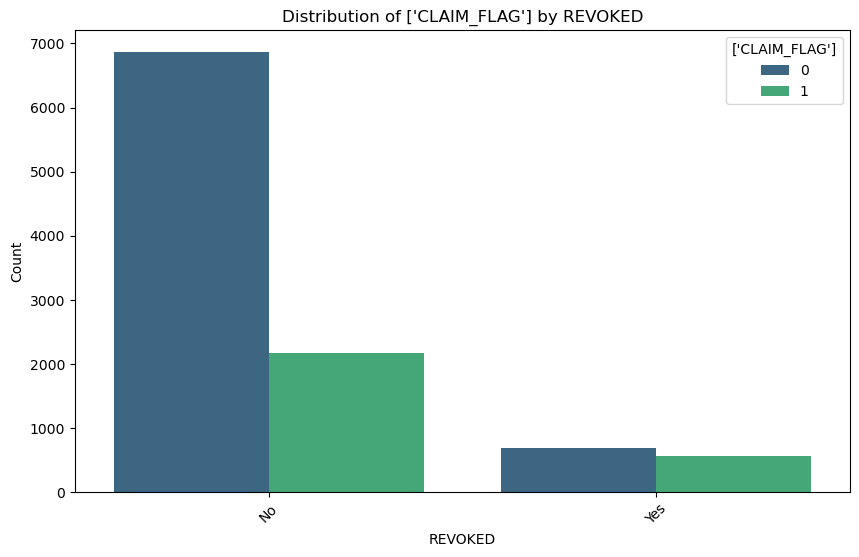

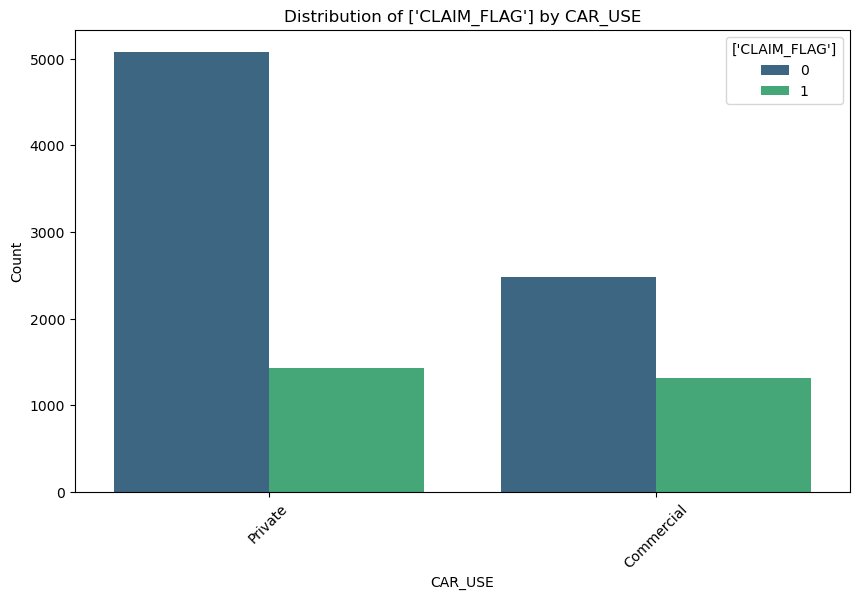

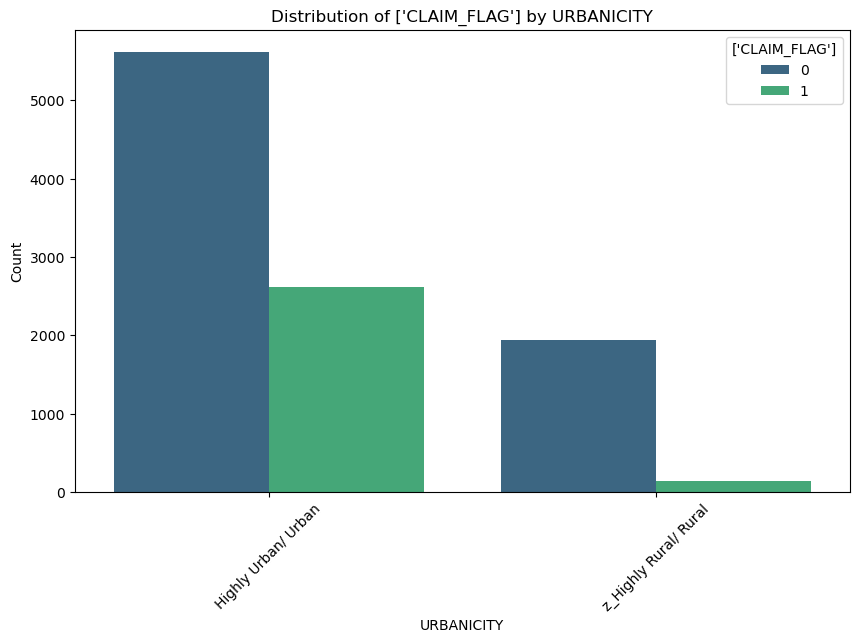

In [367]:
for feature in discrete:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='CLAIM_FLAG', palette='viridis')
    plt.title(f'Distribution of {Target} by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=Target)
    plt.show()

In [368]:
for col in df.columns:
    print({col})
    print(df[col].unique())

{'ID'}
[ 63581743 132761049 921317019 ...  67790126 849208064 680381960]
{'KIDSDRIV'}
[0 1 2 3 4]
{'BIRTH'}
['16MAR39' '21JAN56' '18NOV51' ... '13AUG54' '18JUN51' '27FEB47']
{'AGE'}
[60. 43. 48. 35. 51. 50. 34. 54. 40. 44. 37. 53. 55. 45. 39. 59. 42. 31.
 28. 47. 46. 33. 32. 49. 36. 52. 41. 56. 38. 63. 62. 30. 29. 58. 64. 66.
 26. 61. 80. 57. nan 25. 27. 20. 21. 19. 72. 69. 24. 67. 22. 23. 65. 70.
 17. 16. 81. 73. 71. 68. 18. 76.]
{'HOMEKIDS'}
[0 1 2 3 4 5]
{'YOJ'}
[11. 10. 14. nan 12.  7.  5.  0. 13.  9. 17.  8. 15. 16.  6. 18. 23.  4.
  3.  2. 19.  1.]
{'INCOME'}
[ 67349.  91449.  52881. ... 164669. 107204.  53235.]
{'PARENT1'}
['No' 'Yes']
{'HOME_VAL'}
[     0. 257252. 124191. ... 332591. 170611. 197017.]
{'MSTATUS'}
['z_No' 'Yes']
{'GENDER'}
['M' 'z_F']
{'EDUCATION'}
['PhD' 'z_High School' 'Bachelors' '<High School' 'Masters']
{'OCCUPATION'}
['Professional' 'z_Blue Collar' 'Manager' 'Clerical' 'Doctor' 'Lawyer' nan
 'Home Maker' 'Student']
{'TRAVTIME'}
[ 14  22  26   5  32  36  46 

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   float64
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   float64
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  float64
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

### challenge : when a row has multiple missing values, gauging impact of dropping that row vs filling it 

In [370]:
df.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

### filling in missing values 

([<matplotlib.patches.Wedge at 0x26d4b9d5220>,
 [Text(0.8079464320584789, 0.746473417426216, 'z_Blue Collar'),
  Text(-0.46781200475538204, 0.9955661345218361, 'Clerical'),
  Text(-1.0869490935191102, 0.16894279534204779, 'Professional'),
  Text(-0.8309081486821794, -0.7208270586302608, 'Manager'),
  Text(-0.1211373056973322, -1.0933095413323672, 'Lawyer'),
  Text(0.5454389157223369, -0.9552467687543578, 'Student'),
  Text(0.9736038941204318, -0.5119525928770468, 'Home Maker'),
  Text(1.0939828144935797, -0.11489822275695281, 'Doctor')])

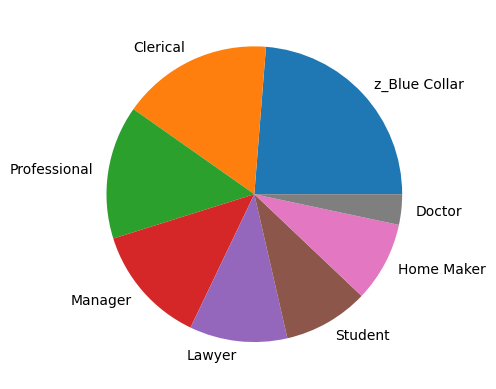

In [371]:
c_value = df['OCCUPATION'].value_counts().values
index = df['OCCUPATION'].value_counts().index

plt.pie(c_value, labels=index )

In [372]:
df['INCOME'].isna().sum()

570

(array([1.126e+03, 3.330e+02, 4.990e+02, 6.300e+02, 7.060e+02, 6.850e+02,
        6.750e+02, 6.560e+02, 6.130e+02, 5.750e+02, 5.220e+02, 3.710e+02,
        3.810e+02, 3.200e+02, 2.970e+02, 2.280e+02, 1.650e+02, 1.530e+02,
        1.480e+02, 1.010e+02, 9.100e+01, 6.800e+01, 5.000e+01, 5.700e+01,
        5.800e+01, 4.600e+01, 3.400e+01, 2.800e+01, 1.300e+01, 2.300e+01,
        1.900e+01, 1.200e+01, 1.000e+01, 8.000e+00, 8.000e+00, 2.000e+00,
        3.000e+00, 6.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([     0. ,   7340.6,  14681.2,  22021.8,  29362.4,  36703. ,
         44043.6,  51384.2,  58724.8,  66065.4,  73406. ,  80746.6,
         88087.2,  95427.8, 102768.4, 110109. , 117449.6, 124790.2,
        132130.8, 139471.4, 146812. , 154152.6, 161493.2, 168833.8,
        176174.4, 183515. , 190855.6, 198196.2, 205536.8, 212877.4,
        220218. , 227558.6, 234899.2

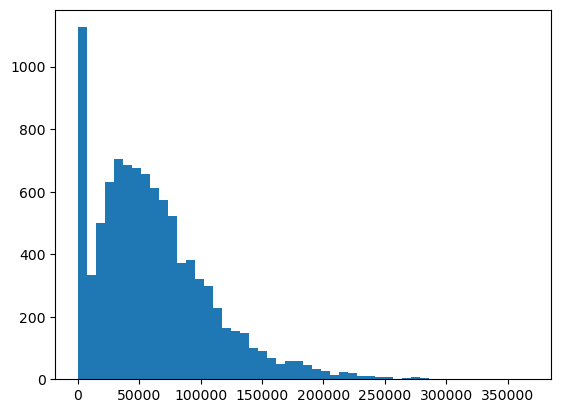

In [373]:
c_val =  df['INCOME'].values

plt.hist(c_val, bins=50)

Mode Imputation will be done to determine missing values as the graph is negatively skewed with multiple outliers

### Median Imupation for INCOME

In [374]:
median_value = df['INCOME'].median()
median_value

53529.0

In [375]:
df['INCOME'].fillna(median_value,inplace =True)

C:\Users\Azri\AppData\Local\Temp\ipykernel_22580\3217863455.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['INCOME'].fillna(median_value,inplace =True)


(array([1.126e+03, 3.330e+02, 4.990e+02, 6.300e+02, 7.060e+02, 6.850e+02,
        6.750e+02, 1.226e+03, 6.130e+02, 5.750e+02, 5.220e+02, 3.710e+02,
        3.810e+02, 3.200e+02, 2.970e+02, 2.280e+02, 1.650e+02, 1.530e+02,
        1.480e+02, 1.010e+02, 9.100e+01, 6.800e+01, 5.000e+01, 5.700e+01,
        5.800e+01, 4.600e+01, 3.400e+01, 2.800e+01, 1.300e+01, 2.300e+01,
        1.900e+01, 1.200e+01, 1.000e+01, 8.000e+00, 8.000e+00, 2.000e+00,
        3.000e+00, 6.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([     0. ,   7340.6,  14681.2,  22021.8,  29362.4,  36703. ,
         44043.6,  51384.2,  58724.8,  66065.4,  73406. ,  80746.6,
         88087.2,  95427.8, 102768.4, 110109. , 117449.6, 124790.2,
        132130.8, 139471.4, 146812. , 154152.6, 161493.2, 168833.8,
        176174.4, 183515. , 190855.6, 198196.2, 205536.8, 212877.4,
        220218. , 227558.6, 234899.2

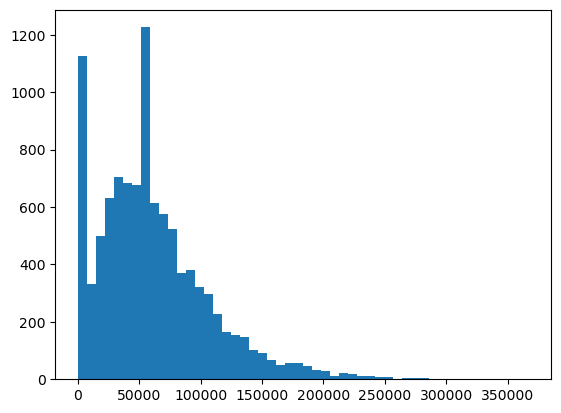

In [376]:
c_val =  df['INCOME'].values

plt.hist(c_val, bins=50)

(array([2.908e+03, 0.000e+00, 1.300e+01, 1.090e+02, 1.660e+02, 2.820e+02,
        3.800e+02, 4.380e+02, 5.170e+02, 5.850e+02, 5.810e+02, 5.640e+02,
        5.220e+02, 4.830e+02, 3.690e+02, 3.570e+02, 2.710e+02, 2.160e+02,
        2.180e+02, 1.480e+02, 9.600e+01, 9.600e+01, 8.400e+01, 5.500e+01,
        4.300e+01, 4.600e+01, 4.400e+01, 3.000e+01, 3.200e+01, 1.200e+01,
        1.800e+01, 1.300e+01, 9.000e+00, 7.000e+00, 3.000e+00, 3.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([     0.  ,  17705.64,  35411.28,  53116.92,  70822.56,  88528.2 ,
        106233.84, 123939.48, 141645.12, 159350.76, 177056.4 , 194762.04,
        212467.68, 230173.32, 247878.96, 265584.6 , 283290.24, 300995.88,
        318701.52, 336407.16, 354112.8 , 371818.44, 389524.08, 407229.72,
        424935.36, 442641.  , 460346.64, 478052.28, 495757.92, 513463.56,
      

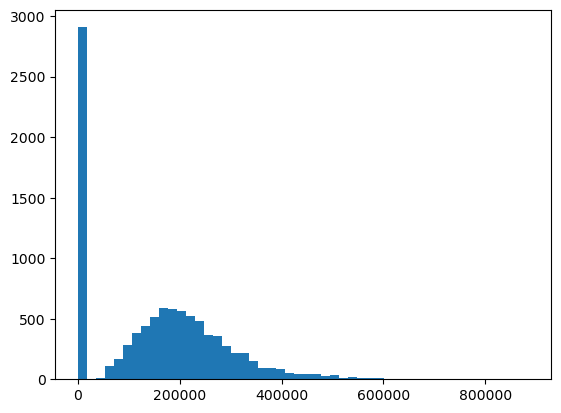

In [377]:
c_val =  df['HOME_VAL'].values

plt.hist(c_val, bins=50)

### Median Imputation for HOME_VAL

In [378]:
df['HOME_VAL'].fillna(df['HOME_VAL'].median(),inplace =True)

C:\Users\Azri\AppData\Local\Temp\ipykernel_22580\319092700.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HOME_VAL'].fillna(df['HOME_VAL'].median(),inplace =True)


In [379]:
df['HOME_VAL'].isna().sum()

0

In [380]:
df['YOJ'].isna().sum()

548

(array([8.140e+02, 5.900e+01, 4.900e+01, 3.430e+02, 3.840e+02, 1.137e+03,
        9.340e+02, 2.767e+03, 1.266e+03, 1.579e+03, 2.430e+02, 1.600e+02,
        1.700e+01, 0.000e+00, 2.000e+00]),
 array([ 0.        ,  1.53333333,  3.06666667,  4.6       ,  6.13333333,
         7.66666667,  9.2       , 10.73333333, 12.26666667, 13.8       ,
        15.33333333, 16.86666667, 18.4       , 19.93333333, 21.46666667,
        23.        ]),
 <BarContainer object of 15 artists>)

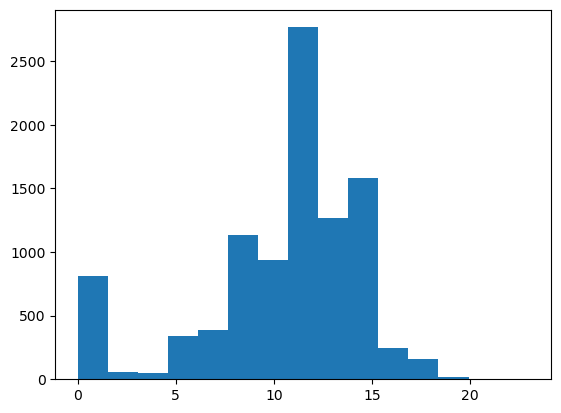

In [382]:
c_val =  df['YOJ'].values

plt.hist(c_val, bins=15)

In [383]:
### Mean Imputaion for YOJ

In [384]:
df['YOJ'].fillna(df['YOJ'].mean(),inplace =True)

C:\Users\Azri\AppData\Local\Temp\ipykernel_22580\2076274052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YOJ'].fillna(df['YOJ'].mean(),inplace =True)


In [385]:
### Mode Imputation of categorical feature OCCUPATION

In [386]:
df['OCCUPATION'].isna().sum()

665

In [387]:
df['OCCUPATION'].fillna(df['OCCUPATION'].mode()[0], inplace=True)

C:\Users\Azri\AppData\Local\Temp\ipykernel_22580\3785436074.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION'].fillna(df['OCCUPATION'].mode()[0], inplace=True)


In [388]:
df['OCCUPATION'].unique

<bound method Series.unique of 0         Professional
1        z_Blue Collar
2              Manager
3             Clerical
4        z_Blue Collar
             ...      
10297          Manager
10298    z_Blue Collar
10299    z_Blue Collar
10300       Home Maker
10301         Clerical
Name: OCCUPATION, Length: 10302, dtype: object>

(array([1408.,    0., 2953.,    0., 1257.,    0., 1590.,    0.,  321.,
           0., 1031.,    0.,  843.,    0.,  899.]),
 array([0.        , 0.46666667, 0.93333333, 1.4       , 1.86666667,
        2.33333333, 2.8       , 3.26666667, 3.73333333, 4.2       ,
        4.66666667, 5.13333333, 5.6       , 6.06666667, 6.53333333,
        7.        ]),
 <BarContainer object of 15 artists>)

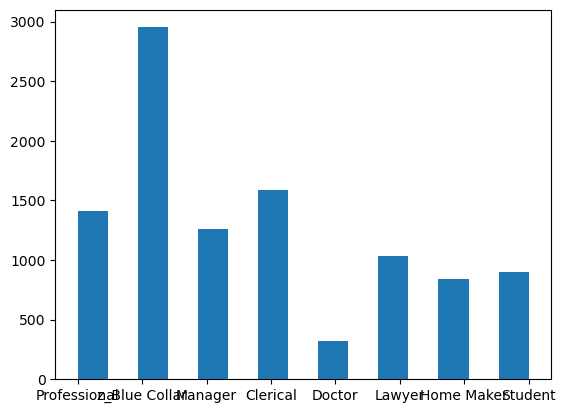

In [389]:
c_val =  df['OCCUPATION'].values

plt.hist(c_val, bins=15)

# Encoding

### Dropping ID

In [390]:
df = df.drop(['ID'],axis=1)

df.head()

KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ   INCOME PARENT1  HOME_VAL MSTATUS  \
0         0  16MAR39  60.0         0  11.0  67349.0      No       0.0    z_No   
1         0  21JAN56  43.0         0  11.0  91449.0      No  257252.0    z_No   
2         0  18NOV51  48.0         0  11.0  52881.0      No       0.0    z_No   
3         0  05MAR64  35.0         1  10.0  16039.0      No  124191.0     Yes   
4         0  05JUN48  51.0         0  14.0  53529.0      No  306251.0     Yes   

  GENDER  ... CAR_TYPE RED_CAR  OLDCLAIM CLM_FREQ  REVOKED  MVR_PTS CLM_AMT  \
0      M  ...  Minivan     yes    4461.0        2       No        3     0.0   
1      M  ...  Minivan     yes       0.0        0       No        0     0.0   
2      M  ...      Van     yes       0.0        0       No        2     0.0   
3    z_F  ...    z_SUV      no   38690.0        2       No        3     0.0   
4      M  ...  Minivan     yes       0.0        0       No        0     0.0   

  CAR_AGE  CLAIM_FLAG           URBANICITY  
0    18.0           0  Highly Urban/ Urban  
1     1.0           0  Highly Urban/ Urban  
2    10.0           0  Highly Urban/ Urban  
3    10.0           0  Highly Urban/ Urban  
4     6.0           0  Highly Urban/ Urban  

[5 rows x 26 columns]

### Dropping the AGE column and using the BIRTH year column to generate an age column
* assuming BIRTH column is correct
* assuming the year is 1999


In [391]:
df['AGE'].isnull().sum()

7

In [392]:
df['BIRTH'].isnull().sum()

0

In [393]:
# Generating cleaned Birth Column with only the year 

df['BIRTH'].head()

0    16MAR39
1    21JAN56
2    18NOV51
3    05MAR64
4    05JUN48
Name: BIRTH, dtype: object

In [394]:
df['adjusted_birth'] = df['BIRTH'].str.slice(5).astype('float') 
df['adjusted_birth'].head()

0    39.0
1    56.0
2    51.0
3    64.0
4    48.0
Name: adjusted_birth, dtype: float64

In [395]:
df['AGE'].isnull().sum()

7

In [396]:
df['adjusted_birth'].isnull().sum()

0

In [397]:
df['current_year'] = df['adjusted_birth'] + df['AGE']

In [398]:
df['current_year'].isnull().sum()

7

In [399]:
df['current_year'].value_counts()

current_year
99.0    9050
98.0    1245
Name: count, dtype: int64

In [400]:
#we shall assume some people have not reached their birthday when they made their claim on the year the dataset was created

df['current_year']= 99.0

In [401]:
df['GEN_AGE'] = df['current_year'] - df['adjusted_birth']

df['GEN_AGE'].shape

(10302,)

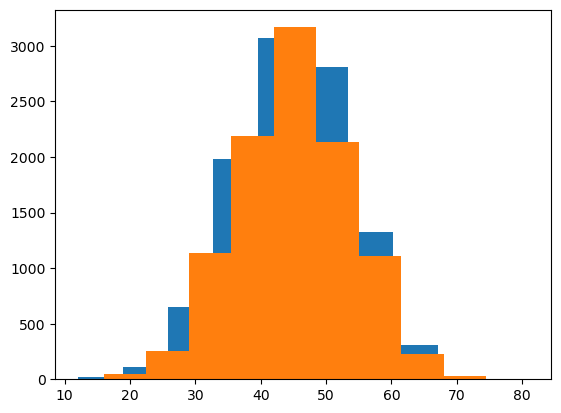

In [402]:
plt.hist(df['GEN_AGE'])
plt.hist(df['AGE'])

plt.show()

# HMMMMMM.....

In [403]:
df = df.drop(['AGE','BIRTH', 'adjusted_birth', 'current_year' ],axis=1)



### CAR_AGE missing values set using median imputation

(array([1.000e+00, 4.000e+00, 2.489e+03, 8.800e+01, 1.690e+02, 9.120e+02,
        6.550e+02, 1.355e+03, 6.000e+02, 1.016e+03, 8.460e+02, 3.700e+02,
        5.540e+02, 1.910e+02, 2.670e+02, 6.500e+01, 5.500e+01, 1.300e+01,
        1.100e+01, 2.000e+00]),
 array([-3.  , -1.45,  0.1 ,  1.65,  3.2 ,  4.75,  6.3 ,  7.85,  9.4 ,
        10.95, 12.5 , 14.05, 15.6 , 17.15, 18.7 , 20.25, 21.8 , 23.35,
        24.9 , 26.45, 28.  ]),
 <BarContainer object of 20 artists>)

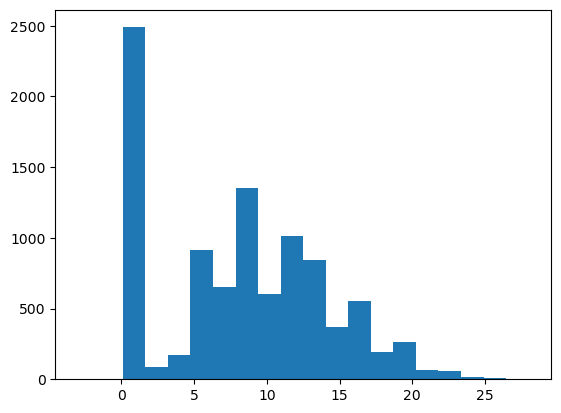

In [404]:
plt.hist(df['CAR_AGE'], bins=20)

In [405]:
df['CAR_AGE'].describe()



count    9663.000000
mean        8.298148
std         5.714450
min        -3.000000
25%         1.000000
50%         8.000000
75%        12.000000
max        28.000000
Name: CAR_AGE, dtype: float64

In [406]:
df['CAR_AGE'].fillna(df['CAR_AGE'].median(),inplace =True)

C:\Users\Azri\AppData\Local\Temp\ipykernel_22580\1575513654.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CAR_AGE'].fillna(df['CAR_AGE'].median(),inplace =True)


In [407]:
df['CAR_AGE'].describe()

# CAR_AGE after the median imputaion
# sliight changes in std deviation and mean

count    10302.000000
mean         8.279654
std          5.534838
min         -3.000000
25%          3.000000
50%          8.000000
75%         12.000000
max         28.000000
Name: CAR_AGE, dtype: float64

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        2.489e+03, 0.000e+00, 1.800e+01, 7.000e+01, 0.000e+00, 1.690e+02,
        3.600e+02, 0.000e+00, 5.520e+02, 0.000e+00, 6.550e+02, 1.335e+03,
        0.000e+00, 6.590e+02, 6.000e+02, 0.000e+00, 5.490e+02, 0.000e+00,
        4.670e+02, 4.500e+02, 0.000e+00, 3.960e+02, 0.000e+00, 3.700e+02,
        2.890e+02, 0.000e+00, 2.650e+02, 1.910e+02, 0.000e+00, 1.550e+02,
        0.000e+00, 1.120e+02, 6.500e+01, 0.000e+00, 3.300e+01, 2.200e+01,
        0.000e+00, 1.300e+01, 0.000e+00, 8.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([-3.  , -2.38, -1.76, -1.14, -0.52,  0.1 ,  0.72,  1.34,  1.96,
         2.58,  3.2 ,  3.82,  4.44,  5.06,  5.68,  6.3 ,  6.92,  7.54,
         8.16,  8.78,  9.4 , 10.02, 10.64, 11.26, 11.88, 12.5 , 13.12,
        13.74, 14.36, 14.98, 15.6 , 16.22, 16.84, 17.46, 18.08, 18.7 ,
        19.32, 19.94, 20.56, 21.18, 21.8 , 22.42, 23.04, 23.66, 24.28,
        24.9 , 25.52,

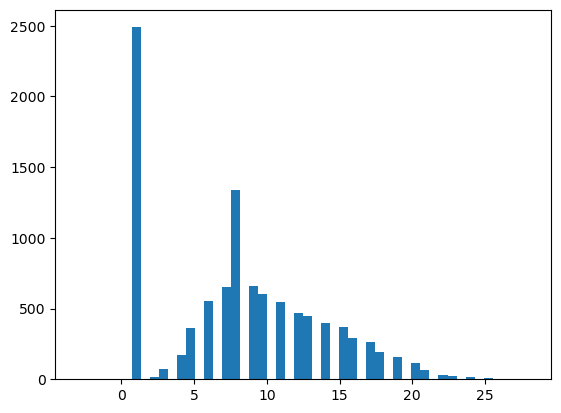

In [408]:
plt.hist(df['CAR_AGE'], bins=50)

### ENCODING

In [409]:
df['PARENT1'].value_counts()

PARENT1
No     8959
Yes    1343
Name: count, dtype: int64

In [410]:
mapping = {
    'Yes':1,
    'No':0
}



df['PARENT1'] = df['PARENT1'].replace(mapping)


C:\Users\Azri\AppData\Local\Temp\ipykernel_22580\1528589944.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PARENT1'] = df['PARENT1'].replace(mapping)


In [291]:
df['PARENT1'].value_counts()

PARENT1
0    8959
1    1343
Name: count, dtype: int64

In [293]:
df['MSTATUS'].value_counts()

MSTATUS
Yes     6188
z_No    4114
Name: count, dtype: int64

In [411]:
mapping = {
    'Yes':1,
    'z_No':0
}



df['MSTATUS'] = df['MSTATUS'].replace(mapping)


C:\Users\Azri\AppData\Local\Temp\ipykernel_22580\3381354989.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MSTATUS'] = df['MSTATUS'].replace(mapping)


In [412]:
df['MSTATUS'].value_counts()

MSTATUS
1    6188
0    4114
Name: count, dtype: int64

In [413]:
df['RED_CAR'].value_counts()

RED_CAR
no     7326
yes    2976
Name: count, dtype: int64

In [414]:
mapping = {
    'yes':1,
    'no':0
}

df['RED_CAR'] = df['RED_CAR'].replace(mapping)

df['RED_CAR'].value_counts()

C:\Users\Azri\AppData\Local\Temp\ipykernel_22580\1071572493.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RED_CAR'] = df['RED_CAR'].replace(mapping)


RED_CAR
0    7326
1    2976
Name: count, dtype: int64

In [415]:
df['REVOKED'].value_counts()

REVOKED
No     9041
Yes    1261
Name: count, dtype: int64

In [416]:
mapping = {
    'Yes':1,
    'No':0
}

df['REVOKED'] = df['REVOKED'].replace(mapping)

df['REVOKED'].value_counts()

C:\Users\Azri\AppData\Local\Temp\ipykernel_22580\488609395.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['REVOKED'] = df['REVOKED'].replace(mapping)


REVOKED
0    9041
1    1261
Name: count, dtype: int64

In [417]:
df['URBANICITY'].value_counts()

URBANICITY
Highly Urban/ Urban      8230
z_Highly Rural/ Rural    2072
Name: count, dtype: int64

In [418]:
df = pd.get_dummies(df,columns=['GENDER', 'EDUCATION', 'OCCUPATION','CAR_USE', 'CAR_TYPE', 'URBANICITY' ], dtype=np.float64 )

df.columns

Index(['KIDSDRIV', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL',
       'MSTATUS', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG',
       'GEN_AGE', 'GENDER_M', 'GENDER_z_F', 'EDUCATION_<High School',
       'EDUCATION_Bachelors', 'EDUCATION_Masters', 'EDUCATION_PhD',
       'EDUCATION_z_High School', 'OCCUPATION_Clerical', 'OCCUPATION_Doctor',
       'OCCUPATION_Home Maker', 'OCCUPATION_Lawyer', 'OCCUPATION_Manager',
       'OCCUPATION_Professional', 'OCCUPATION_Student',
       'OCCUPATION_z_Blue Collar', 'CAR_USE_Commercial', 'CAR_USE_Private',
       'CAR_TYPE_Minivan', 'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup',
       'CAR_TYPE_Sports Car', 'CAR_TYPE_Van', 'CAR_TYPE_z_SUV',
       'URBANICITY_Highly Urban/ Urban', 'URBANICITY_z_Highly Rural/ Rural'],
      dtype='object')

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   KIDSDRIV                          10302 non-null  int64  
 1   HOMEKIDS                          10302 non-null  int64  
 2   YOJ                               10302 non-null  float64
 3   INCOME                            10302 non-null  float64
 4   PARENT1                           10302 non-null  int64  
 5   HOME_VAL                          10302 non-null  float64
 6   MSTATUS                           10302 non-null  int64  
 7   TRAVTIME                          10302 non-null  int64  
 8   BLUEBOOK                          10302 non-null  float64
 9   TIF                               10302 non-null  int64  
 10  RED_CAR                           10302 non-null  int64  
 11  OLDCLAIM                          10302 non-null  float64
 12  CLM_

In [420]:
df =df.astype('float')

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   KIDSDRIV                          10302 non-null  float64
 1   HOMEKIDS                          10302 non-null  float64
 2   YOJ                               10302 non-null  float64
 3   INCOME                            10302 non-null  float64
 4   PARENT1                           10302 non-null  float64
 5   HOME_VAL                          10302 non-null  float64
 6   MSTATUS                           10302 non-null  float64
 7   TRAVTIME                          10302 non-null  float64
 8   BLUEBOOK                          10302 non-null  float64
 9   TIF                               10302 non-null  float64
 10  RED_CAR                           10302 non-null  float64
 11  OLDCLAIM                          10302 non-null  float64
 12  CLM_

### Examining Correlation after Dataframe encoding

In [422]:
# Select only columns with numeric data types (int and float)
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
df_corr = df_numeric.corr()

# Display the correlation matrix
df_corr


KIDSDRIV  HOMEKIDS       YOJ    INCOME  \
KIDSDRIV                          1.000000  0.463653  0.041668 -0.042203   
HOMEKIDS                          0.463653  1.000000  0.075582 -0.155628   
YOJ                               0.041668  0.075582  1.000000  0.277604   
INCOME                           -0.042203 -0.155628  0.277604  1.000000   
PARENT1                           0.200157  0.448719 -0.038150 -0.065046   
HOME_VAL                         -0.015286 -0.104773  0.257816  0.545886   
MSTATUS                           0.041655  0.045968  0.136939 -0.035361   
TRAVTIME                          0.012207 -0.000722 -0.016703 -0.050078   
BLUEBOOK                         -0.028508 -0.108569  0.144197  0.418434   
TIF                              -0.005830  0.007509  0.023304  0.002618   
RED_CAR                          -0.040508 -0.068117  0.050588  0.064676   
OLDCLAIM                          0.023886  0.029756 -0.004960 -0.038168   
CLM_FREQ                          0.038952  0.038661 -0.022908 -0.047720   
REVOKED                           0.033639  0.044181 -0.009699 -0.022065   
MVR_PTS                           0.048424  0.064294 -0.040493 -0.061264   
CLM_AMT                           0.068283  0.068646 -0.025607 -0.055901   
CAR_AGE                          -0.057403 -0.153891  0.061096  0.392253   
CLAIM_FLAG                        0.108421  0.123049 -0.064471 -0.138222   
GEN_AGE                          -0.076801 -0.447070  0.139387  0.182245   
GENDER_M                         -0.039712 -0.113403  0.077391  0.111124   
GENDER_z_F                        0.039712  0.113403 -0.077391 -0.111124   
EDUCATION_<High School            0.041413  0.125350 -0.040444 -0.303961   
EDUCATION_Bachelors              -0.003394 -0.013025  0.014096  0.046693   
EDUCATION_Masters                -0.040491 -0.128306  0.072199  0.255382   
EDUCATION_PhD                    -0.047467 -0.104150  0.032349  0.417692   
EDUCATION_z_High School           0.036988  0.094671 -0.066844 -0.299865   
OCCUPATION_Clerical               0.037576  0.123598  0.099291 -0.243960   
OCCUPATION_Doctor                -0.038983 -0.077706  0.036816  0.247351   
OCCUPATION_Home Maker             0.005098  0.020832 -0.329662 -0.296875   
OCCUPATION_Lawyer                -0.033550 -0.100192  0.077838  0.185109   
OCCUPATION_Manager               -0.015689 -0.078268  0.073655  0.203369   
OCCUPATION_Professional          -0.019169 -0.055790  0.081257  0.116965   
OCCUPATION_Student                0.025676  0.125195 -0.317853 -0.344974   
OCCUPATION_z_Blue Collar          0.014026  0.005872  0.138038  0.136227   
CAR_USE_Commercial               -0.004146 -0.011858  0.025237  0.087109   
CAR_USE_Private                   0.004146  0.011858 -0.025237 -0.087109   
CAR_TYPE_Minivan                 -0.004824 -0.033416  0.046932  0.038866   
CAR_TYPE_Panel Truck             -0.015580 -0.064541  0.044660  0.219556   
CAR_TYPE_Pickup                  -0.002020 -0.007978  0.003338 -0.056260   
CAR_TYPE_Sports Car               0.002053  0.043321 -0.061242 -0.102032   
CAR_TYPE_Van                     -0.028154 -0.046486  0.039018  0.122702   
CAR_TYPE_z_SUV                    0.032421  0.077862 -0.057532 -0.131160   
URBANICITY_Highly Urban/ Urban   -0.043622 -0.061663  0.076671  0.195680   
URBANICITY_z_Highly Rural/ Rural  0.043622  0.061663 -0.076671 -0.195680   

                                   PARENT1  HOME_VAL   MSTATUS  TRAVTIME  \
KIDSDRIV                          0.200157 -0.015286  0.041655  0.012207   
HOMEKIDS                          0.448719 -0.104773  0.045968 -0.000722   
YOJ                              -0.038150  0.257816  0.136939 -0.016703   
INCOME                           -0.065046  0.545886 -0.035361 -0.050078   
PARENT1                           1.000000 -0.243842 -0.474844 -0.015810   
HOME_VAL                         -0.243842  1.000000  0.441044 -0.034464   
MSTATUS                          -0.474844  0.441044  1.000000  0.006010   
TRAVT

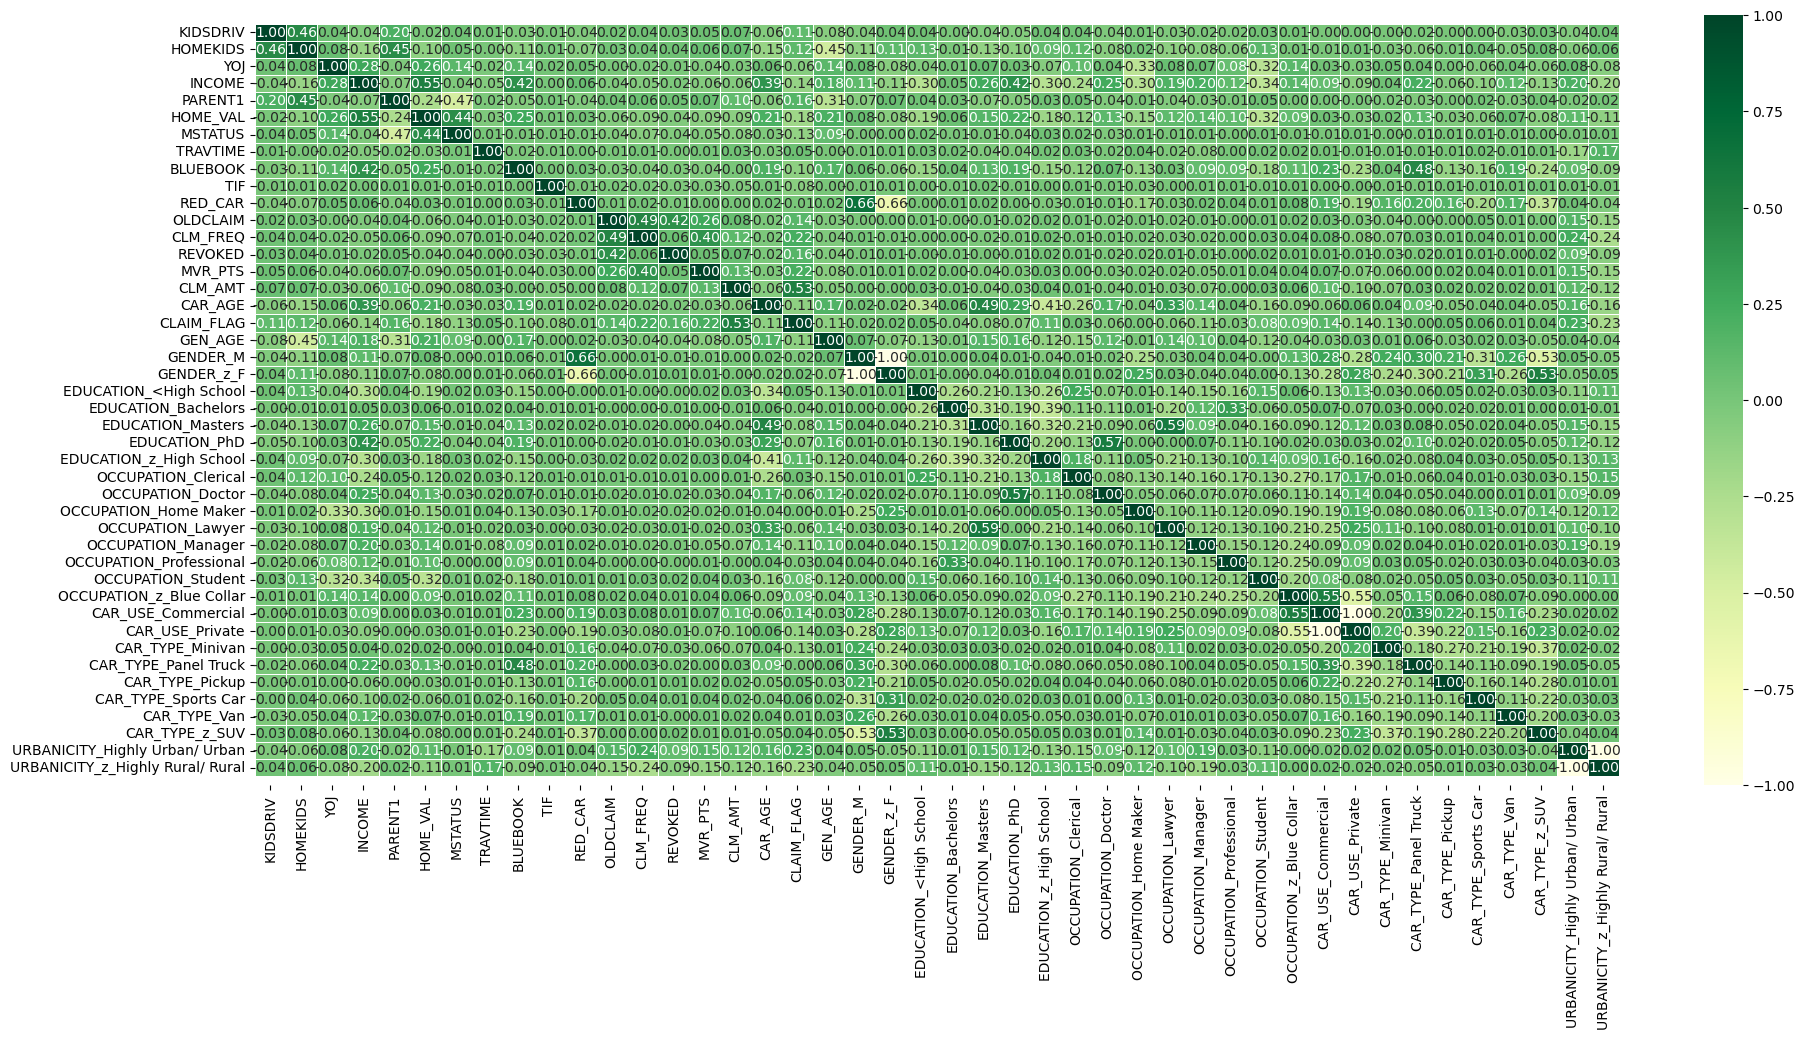

In [423]:
corr_matrix = df_corr
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

# *Normalization of Dataframe*

### MAX Scaling

In [424]:
df_max_scaled = df.copy() 
  
 
for column in df_max_scaled.columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 
      

df_max_scaled.head()

KIDSDRIV  HOMEKIDS       YOJ    INCOME  PARENT1  HOME_VAL  MSTATUS  \
0       0.0       0.0  0.478261  0.183497      0.0  0.000000      0.0   
1       0.0       0.0  0.478261  0.249159      0.0  0.290588      0.0   
2       0.0       0.0  0.478261  0.144078      0.0  0.000000      0.0   
3       0.0       0.2  0.434783  0.043699      0.0  0.140284      1.0   
4       0.0       0.0  0.608696  0.145844      0.0  0.345936      1.0   

   TRAVTIME  BLUEBOOK   TIF  ...  CAR_USE_Commercial  CAR_USE_Private  \
0  0.098592  0.204044  0.44  ...                 0.0              1.0   
1  0.154930  0.214224  0.04  ...                 1.0              0.0   
2  0.183099  0.315027  0.04  ...                 0.0              1.0   
3  0.035211  0.057499  0.16  ...                 0.0              1.0   
4  0.225352  0.221394  0.28  ...                 0.0              1.0   

   CAR_TYPE_Minivan  CAR_TYPE_Panel Truck  CAR_TYPE_Pickup  \
0               1.0                   0.0              0.0   
1               1.0                   0.0              0.0   
2               0.0                   0.0              0.0   
3               0.0                   0.0              0.0   
4               1.0                   0.0              0.0   

   CAR_TYPE_Sports Car  CAR_TYPE_Van  CAR_TYPE_z_SUV  \
0                  0.0           0.0             0.0   
1                  0.0           0.0             0.0   
2                  0.0           1.0             0.0   
3                  0.0           0.0             1.0   
4                  0.0           0.0             0.0   

   URBANICITY_Highly Urban/ Urban  URBANICITY_z_Highly Rural/ Rural  
0                             1.0                               0.0  
1                             1.0                               0.0  
2                             1.0                               0.0  
3                             1.0                               0.0  
4                             1.0                               0.0  

[5 rows x 44 columns]

### MIN MAX Scaling

In [425]:
df_min_max_scaled = df.copy() 
  

for column in df_min_max_scaled.columns: 
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     
  

df_min_max_scaled.head()

KIDSDRIV  HOMEKIDS       YOJ    INCOME  PARENT1  HOME_VAL  MSTATUS  \
0       0.0       0.0  0.478261  0.183497      0.0  0.000000      0.0   
1       0.0       0.0  0.478261  0.249159      0.0  0.290588      0.0   
2       0.0       0.0  0.478261  0.144078      0.0  0.000000      0.0   
3       0.0       0.2  0.434783  0.043699      0.0  0.140284      1.0   
4       0.0       0.0  0.608696  0.145844      0.0  0.345936      1.0   

   TRAVTIME  BLUEBOOK       TIF  ...  CAR_USE_Commercial  CAR_USE_Private  \
0  0.065693  0.186547  0.416667  ...                 0.0              1.0   
1  0.124088  0.196952  0.000000  ...                 1.0              0.0   
2  0.153285  0.299971  0.000000  ...                 0.0              1.0   
3  0.000000  0.036782  0.125000  ...                 0.0              1.0   
4  0.197080  0.204279  0.250000  ...                 0.0              1.0   

   CAR_TYPE_Minivan  CAR_TYPE_Panel Truck  CAR_TYPE_Pickup  \
0               1.0                   0.0              0.0   
1               1.0                   0.0              0.0   
2               0.0                   0.0              0.0   
3               0.0                   0.0              0.0   
4               1.0                   0.0              0.0   

   CAR_TYPE_Sports Car  CAR_TYPE_Van  CAR_TYPE_z_SUV  \
0                  0.0           0.0             0.0   
1                  0.0           0.0             0.0   
2                  0.0           1.0             0.0   
3                  0.0           0.0             1.0   
4                  0.0           0.0             0.0   

   URBANICITY_Highly Urban/ Urban  URBANICITY_z_Highly Rural/ Rural  
0                             1.0                               0.0  
1                             1.0                               0.0  
2                             1.0                               0.0  
3                             1.0                               0.0  
4                             1.0                               0.0  

[5 rows x 44 columns]

### Z-Score Scaling

In [426]:
df_z_scaled = df.copy() 
  
 
for column in df_z_scaled.columns: 
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()     
  

df_z_scaled.head()

KIDSDRIV  HOMEKIDS       YOJ    INCOME   PARENT1  HOME_VAL   MSTATUS  \
0 -0.334222 -0.645371  0.131545  0.134784 -0.387157 -1.233606 -1.226371   
1 -0.334222 -0.645371  0.131545  0.656857 -0.387157  0.815575 -1.226371   
2 -0.334222 -0.645371  0.131545 -0.178632 -0.387157 -1.233606 -1.226371   
3 -0.334222  0.250427 -0.118570 -0.976732 -0.387157 -0.244343  0.815335   
4 -0.334222 -0.645371  0.881891 -0.164595 -0.387157  1.205884  0.815335   

   TRAVTIME  BLUEBOOK       TIF  ...  CAR_USE_Commercial  CAR_USE_Private  \
0 -1.223491 -0.169648  1.379500  ...           -0.762695         0.762695   
1 -0.719386 -0.085413 -1.053120  ...            1.311013        -1.311013   
2 -0.467333  0.748636 -1.053120  ...           -0.762695         0.762695   
3 -1.790610 -1.382163 -0.323334  ...           -0.762695         0.762695   
4 -0.089253 -0.026092  0.406452  ...           -0.762695         0.762695   

   CAR_TYPE_Minivan  CAR_TYPE_Panel Truck  CAR_TYPE_Pickup  \
0          1.680410             -0.300442         -0.45576   
1          1.680410             -0.300442         -0.45576   
2         -0.595035             -0.300442         -0.45576   
3         -0.595035             -0.300442         -0.45576   
4          1.680410             -0.300442         -0.45576   

   CAR_TYPE_Sports Car  CAR_TYPE_Van  CAR_TYPE_z_SUV  \
0            -0.359474     -0.313317       -0.623345   
1            -0.359474     -0.313317       -0.623345   
2            -0.359474      3.191344       -0.623345   
3            -0.359474     -0.313317        1.604092   
4            -0.359474     -0.313317       -0.623345   

   URBANICITY_Highly Urban/ Urban  URBANICITY_z_Highly Rural/ Rural  
0                        0.501734                         -0.501734  
1                        0.501734                         -0.501734  
2                        0.501734                         -0.501734  
3                        0.501734                         -0.501734  
4                        0.501734                         -0.501734  

[5 rows x 44 columns]

## Examination of Correlation after each type of normalization

### Max Scaling

In [428]:
# Select only columns with numeric data types (int and float)
df_numeric = df_max_scaled.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
df_corr = df_numeric.corr()


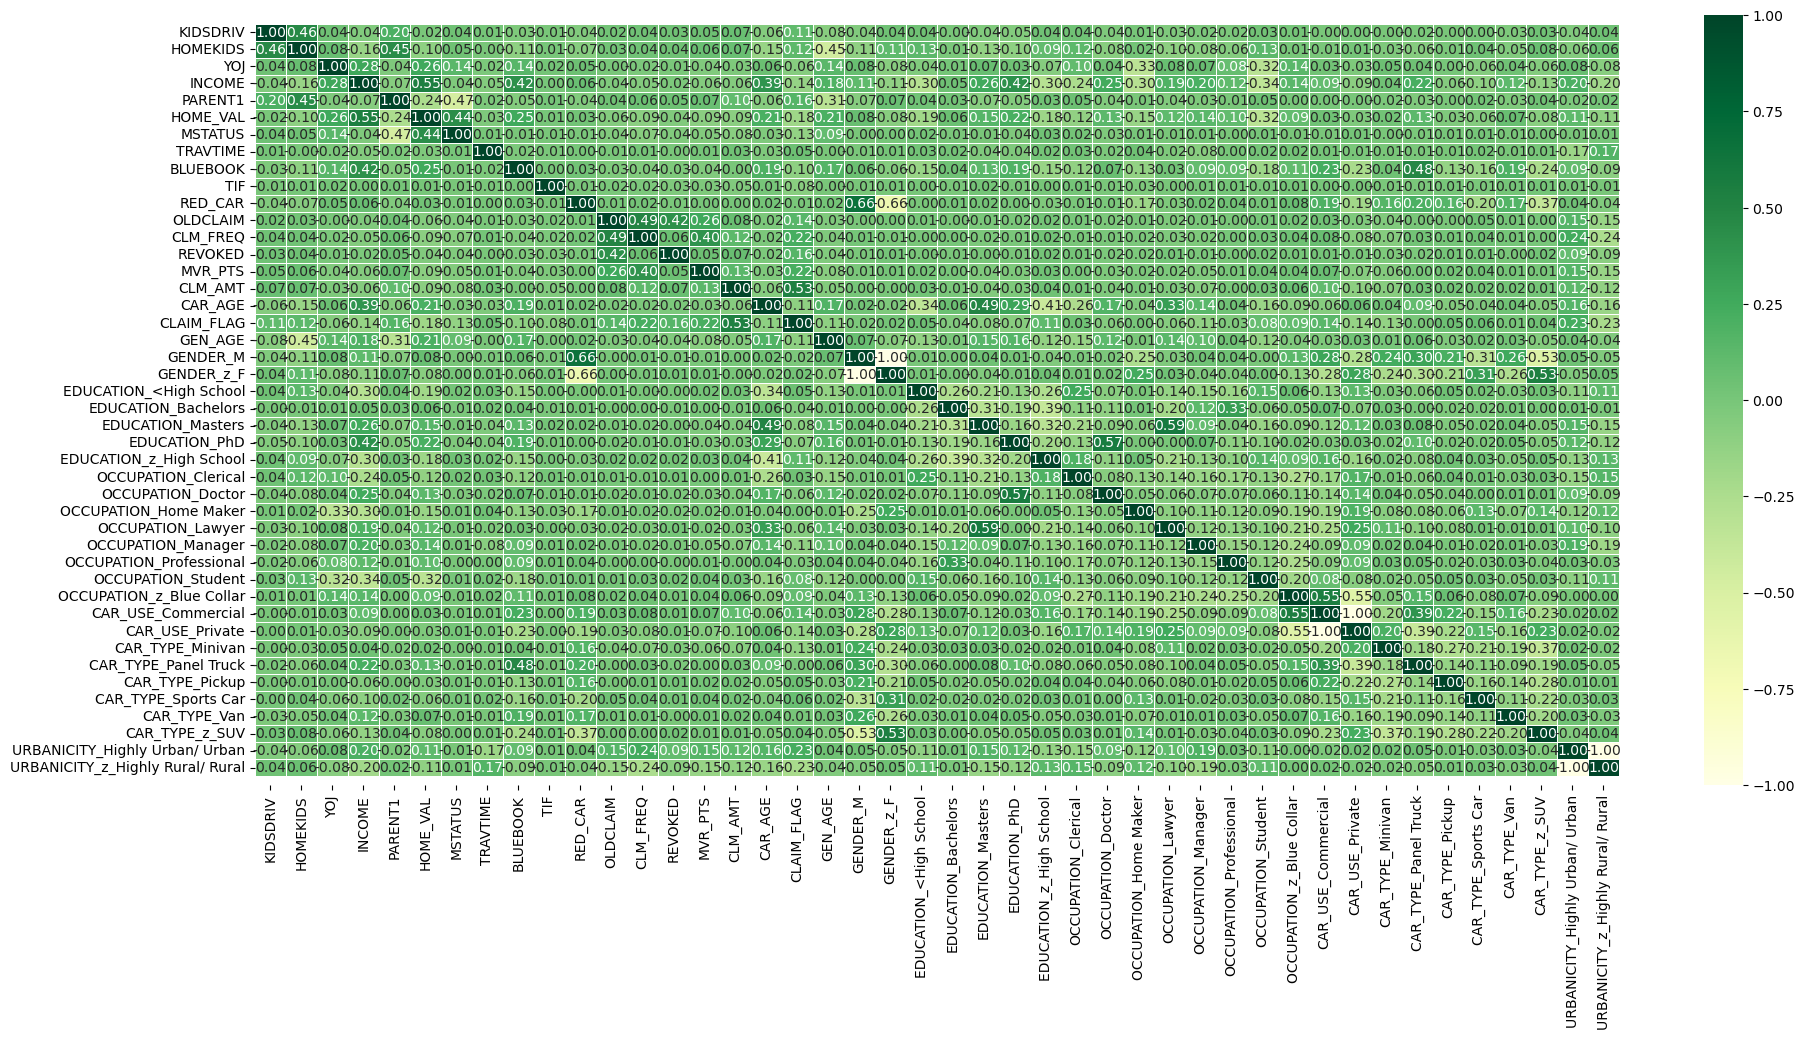

In [429]:
corr_matrix = df_corr
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

### MinMax Scaling

In [431]:
# Select only columns with numeric data types (int and float)
df_numeric = df_min_max_scaled.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
df_corr = df_numeric.corr()

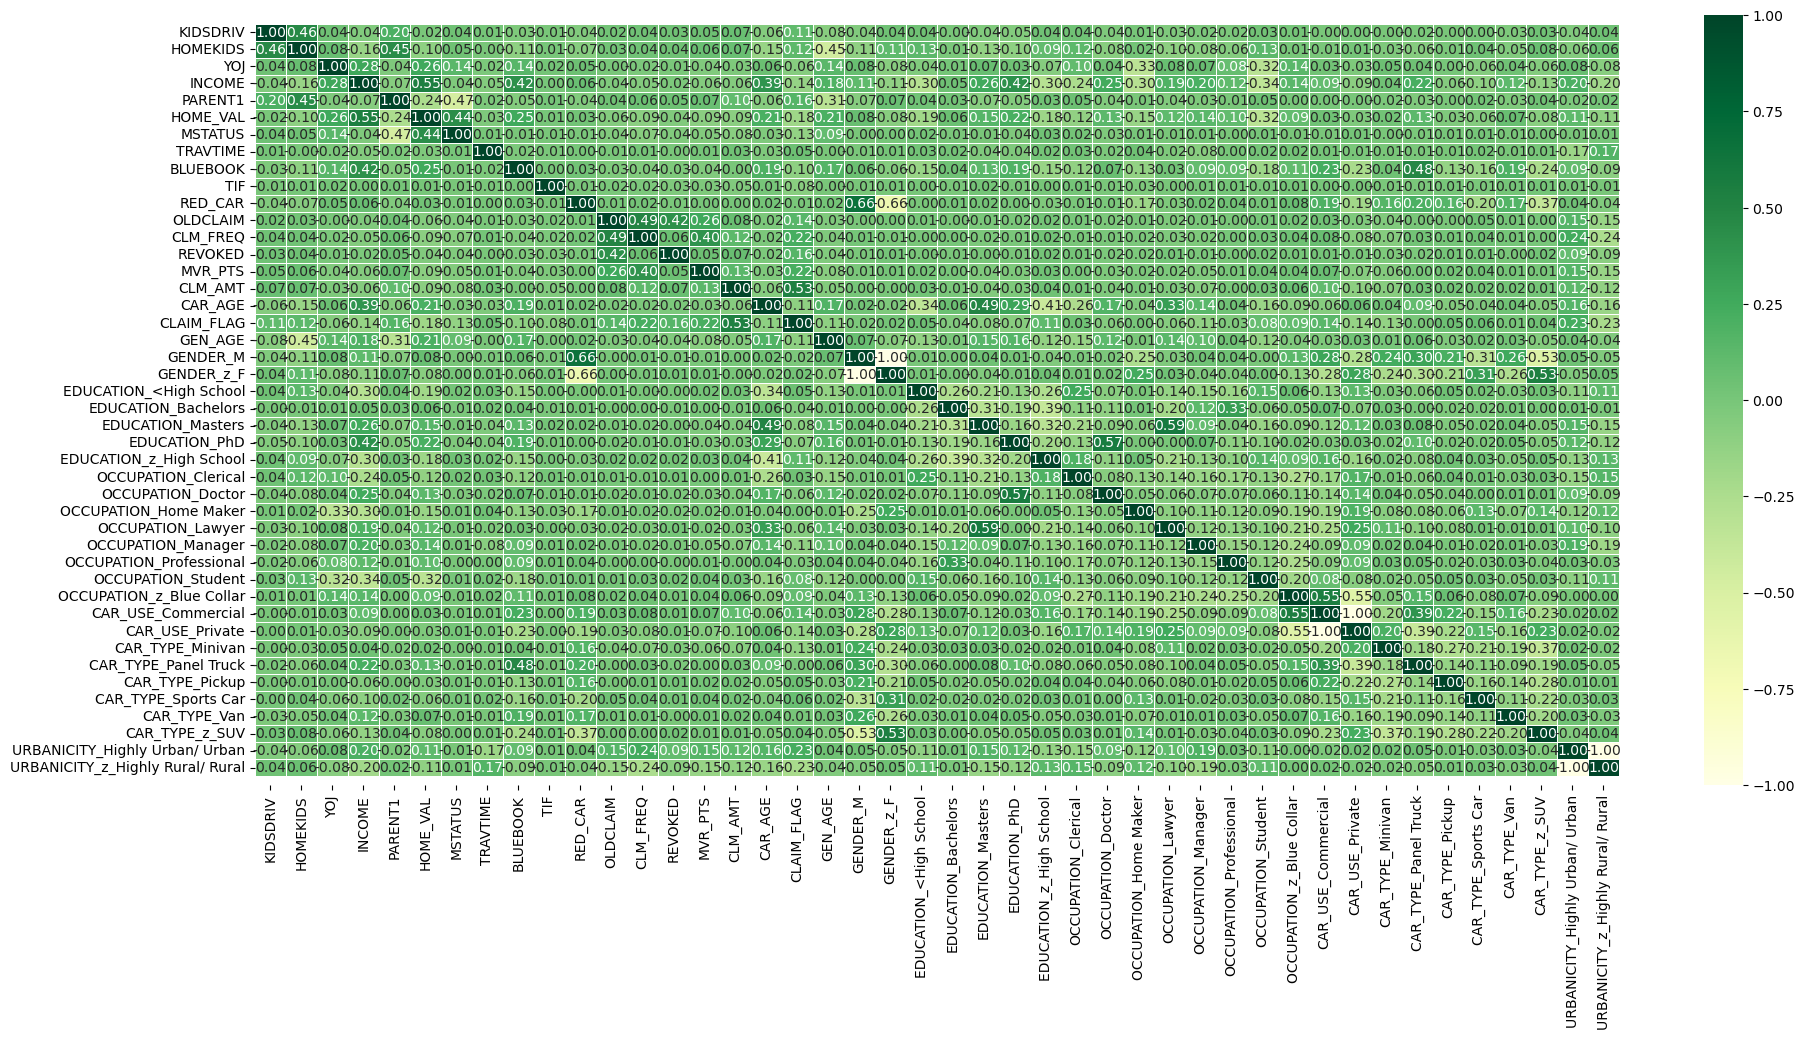

In [432]:
corr_matrix = df_corr
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

### Z- Score Scaling

In [433]:
# Select only columns with numeric data types (int and float)
df_numeric = df_z_scaled.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
df_corr = df_numeric.corr()

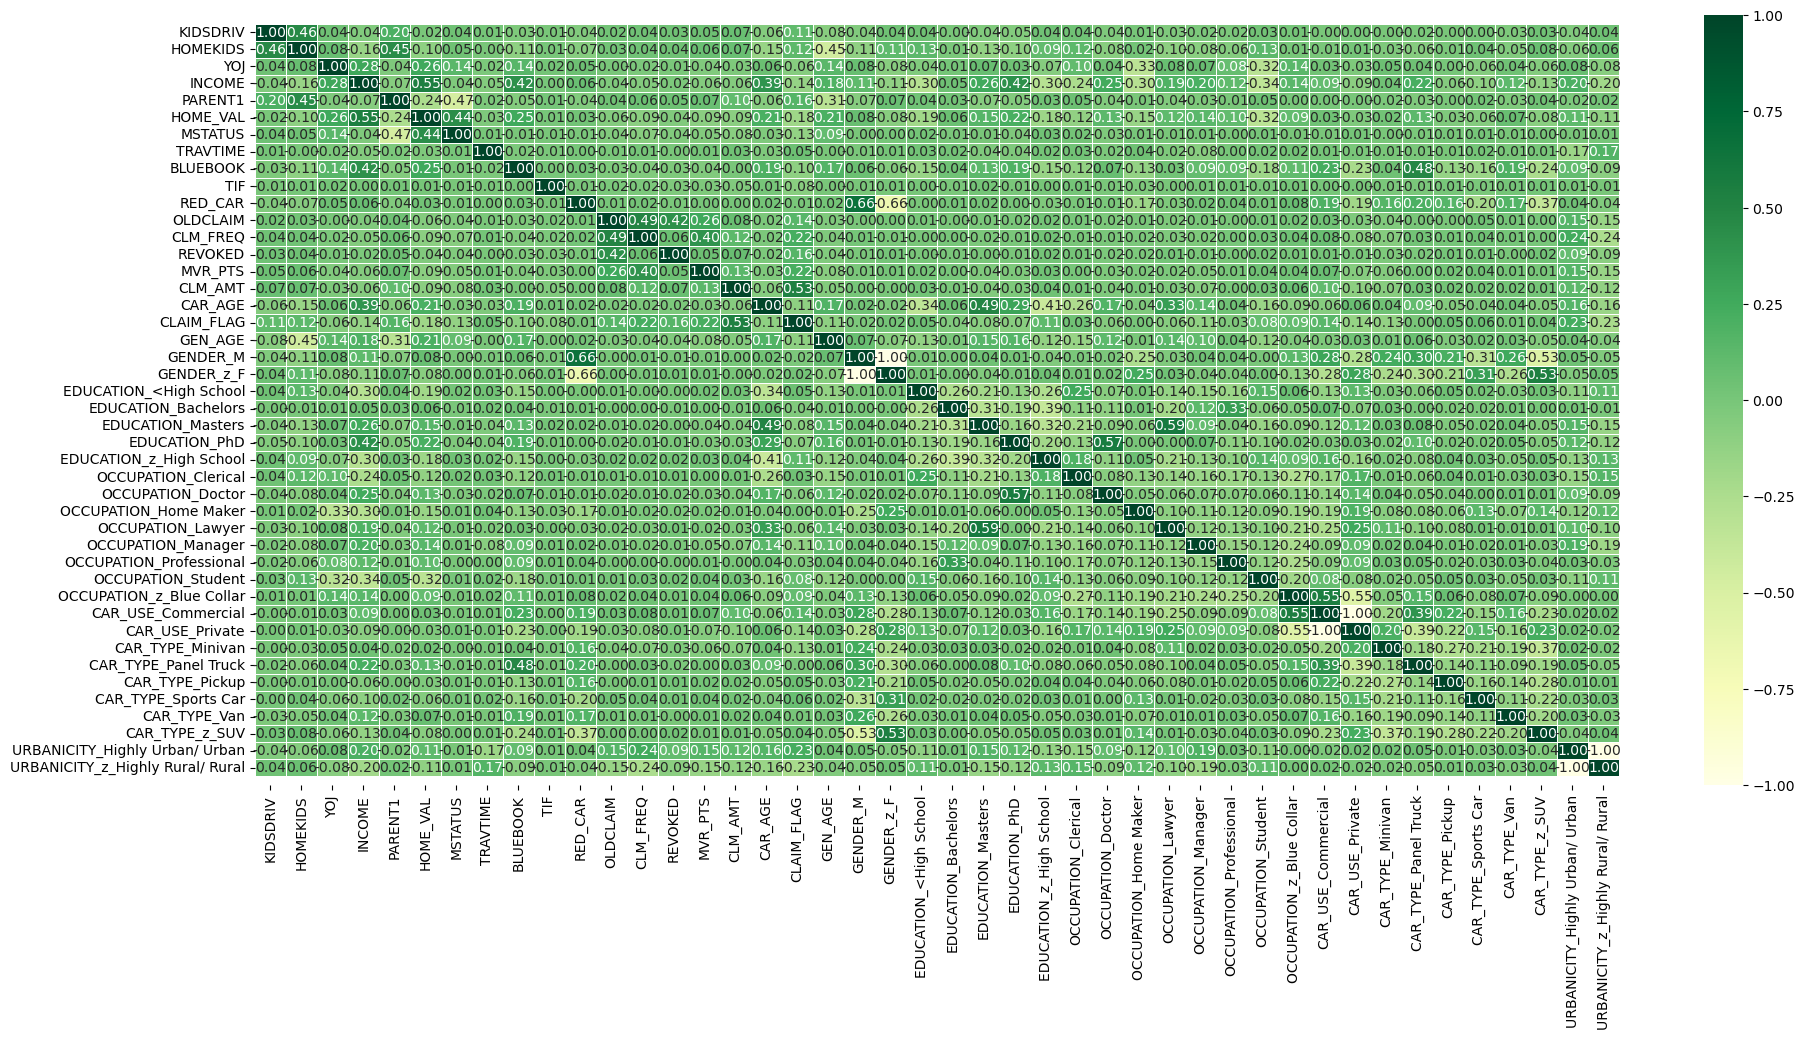

In [434]:
corr_matrix = df_corr
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

# List of dataframes after pre-processing
* `df` -> Dataframe that is preprocessed but no normalization techniques applied
*  `df_z_scaled` -> Data frame normalized using Z-score normalization
*  `df_max_scled` -> max scaled dataframe
*  `df_min_max_scaled` -> Normalized using linear (min-max) scaling

In [435]:
### Choose Dataframe according to ML Model needs